In [30]:
#1 пункт - Сбор данных
#python-binance - библиотека для работы с API Binance (криптобиржа);
#pandas — библиотека для анализа и обработки данных (таблицы, датафреймы и т.п.)

In [1]:
pip install python-binance pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
#API CoinGecko - удобен для получения данных по криптовалютам (цены, рыночные данные, метаданные и т.д.)
!pip install pycoingecko

In [38]:
#собираем топ 10 криптовалют
from pycoingecko import CoinGeckoAPI
from binance.client import Client
import pandas as pd
import datetime
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Инициализация клиентов
cg = CoinGeckoAPI()
binance_client = Client()

# Получаем топ-10 монет с CoinGecko
top_coins = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=10, page=1)

# Исключаем стабильные монеты
stablecoins = ['tether', 'usd-coin']
filtered_coins = [coin for coin in top_coins if coin['id'] not in stablecoins]
coin_id_to_symbol = {coin['id']: coin['symbol'].upper() for coin in filtered_coins}

# Выводим отфильтрованный список
print("Топ-10 криптовалют с CoinGecko (без стейблкоинов):")
for i, (cid, sym) in enumerate(coin_id_to_symbol.items(), 1):
    print(f"{i}. {cid} → {sym}USDT")

# Интервал и даты для 2025 года
interval = '1d'
start_date = "2025-01-01 00:00:00"
end_date = "2025-12-31 23:59:59"


# Сбор исторических цен
def get_binance_data(symbol):
    binance_symbol = f"{symbol}USDT"  # Формируем символ для Binance
    try:
        print(f"Загружается {binance_symbol}...")
        klines = binance_client.get_historical_klines(binance_symbol, interval, start_date, end_date)
        
        # Преобразуем данные в DataFrame
        df = pd.DataFrame(klines, columns=[
            'timestamp', 'open', 'high', 'low', 'close', 'volume',
            'close_time', 'quote_asset_volume', 'number_of_trades',
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        
        # Конвертируем timestamp в datetime и устанавливаем его как индекс
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        
        # Оставляем только столбец 'close' и переименовываем его
        df = df[['close']].astype(float).rename(columns={'close': binance_symbol})
        
        time.sleep(1)  # Пауза между запросами
        return df
    except Exception as e:
        print(f"Ошибка для {binance_symbol}: {e}")
        return None

# Сбор данных для всех монет
all_data = {}
for coin_id, symbol in coin_id_to_symbol.items():
    df = get_binance_data(symbol)
    if df is not None:
        all_data[symbol] = df

# Объединение данных в один DataFrame
merged_df = pd.concat(all_data.values(), axis=1)
merged_df.dropna(inplace=True)  # Убираем строки с пропущенными значениями

# Сохраняем результат в CSV
merged_df.to_csv('auto_top10_binance_prices_2025.csv')
print("Сохранено в auto_top10_binance_prices_2025.csv")


Топ-10 криптовалют с CoinGecko (без стейблкоинов):
1. bitcoin → BTCUSDT
2. ethereum → ETHUSDT
3. ripple → XRPUSDT
4. binancecoin → BNBUSDT
5. solana → SOLUSDT
6. tron → TRXUSDT
7. dogecoin → DOGEUSDT
8. cardano → ADAUSDT
Загружается BTCUSDT...
Загружается ETHUSDT...
Загружается XRPUSDT...
Загружается BNBUSDT...
Загружается SOLUSDT...
Загружается TRXUSDT...
Загружается DOGEUSDT...
Загружается ADAUSDT...
Сохранено в auto_top10_binance_prices_2025.csv


In [6]:
#requests - используется для отправки HTTP-запросов (GET, POST и т.д.).
!pip install requests

In [39]:
import requests
import pandas as pd

# API токен в криптопаник
auth_token = "08ff16993756d5e8c5d677b5300bf5f9ce764a60"

# Указываем криптовалюты, для которых будем собирать новости
cryptos = ['BTC', 'ETH', 'XRP', 'BNB', 'SOL', 'DOGE', 'ADA', 'TRX']

# URL для API запроса
url = f"https://cryptopanic.com/api/v1/posts/?auth_token={auth_token}&currencies={','.join(cryptos)}&public=true"

# Получаем новости
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    # Преобразуем данные в DataFrame
    posts = data['results']
    news_df = pd.DataFrame(posts)
    news_df.to_csv('crypto_news_2025.csv', index=False)
    print("Новости собраны и сохранены в 'crypto_news_2025.csv'.")
else:
    print(f"Ошибка получения новостей: {response.status_code}")

Новости собраны и сохранены в 'crypto_news_2025.csv'.


In [8]:
#scipy — она используется для: статистики и научных вычислений, оптимизации, линейной алгебры,обработки сигналов и прочего
!pip install scipy

  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl (41.2 MB)


In [10]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [ ]:
#2 пункт - Предобработка данных

In [40]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Удаление дубликатов
merged_df = merged_df.drop_duplicates()

# Обработка пропусков
merged_df = merged_df.fillna(merged_df.mean())  # Заполнение пропусков средним значением

# Обработка выбросов (фильтрация по межквартильному размаху)
Q1 = merged_df.quantile(0.25)
Q3 = merged_df.quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[~((merged_df < (Q1 - 1.5 * IQR)) | (merged_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Стандартизация данных
scaler = StandardScaler()
merged_df[merged_df.columns] = scaler.fit_transform(merged_df[merged_df.columns])

# Сохранение в файл
merged_df.to_csv('preprocessed_crypto_data.csv')
print("Предобработанные данные сохранены в preprocessed_crypto_data.csv")

Предобработанные данные сохранены в preprocessed_crypto_data.csv


In [41]:
import pandas as pd

# Загрузка новостей и цен
news_df = pd.read_csv('crypto_news_2025.csv')
price_df = pd.read_csv('preprocessed_crypto_data.csv')

# Приводим даты к одному формату
news_df['published_at'] = pd.to_datetime(news_df['published_at']).dt.date
price_df['timestamp'] = pd.to_datetime(price_df['timestamp']).dt.date

# Пример: считаем количество новостей в день
daily_news_count = news_df.groupby('published_at').size().reset_index(name='news_count')

# Объединяем по дате
merged_final_df = price_df.merge(daily_news_count, how='left', left_on='timestamp', right_on='published_at')

# Заполняем пропуски (если в какой-то день не было новостей)
merged_final_df['news_count'] = merged_final_df['news_count'].fillna(0)

# Сохраняем
merged_final_df.to_csv('merged_prices_news.csv', index=False)
print("Синхронизация завершена. Данные сохранены в merged_prices_news.csv")

Синхронизация завершена. Данные сохранены в merged_prices_news.csv


In [14]:
!pip install textblob nltk
#textblob — для анализа текста, извлечения тональности (sentiment analysis), перевода, исправления орфографии и других задач NLP.
#nltk — библиотека для работы с естественным языком, включая токенизацию, лемматизацию, POS-теггинг и многое другое.

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [42]:
import pandas as pd
from textblob import TextBlob
import string

# Загружаем данные
news_df = pd.read_csv('crypto_news_2025.csv')

# Функция для очистки текста
def clean_text(text):
    # Приводим к нижнему регистру и удаляем знаки препинания
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Применяем очистку текста
news_df['cleaned_text'] = news_df['title'].apply(clean_text)

# Функция для анализа тональности
def get_sentiment(text):
    # Используем TextBlob для анализа тональности
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    # Положительное значение - позитивная, отрицательное - негативная, близкое к 0 - нейтральная
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Применяем анализ тональности
news_df['sentiment'] = news_df['cleaned_text'].apply(get_sentiment)

# Сохраняем результаты
news_df.to_csv('crypto_news_with_sentiment_2025.csv', index=False)
print("Тональность новостей добавлена и сохранена в 'crypto_news_with_sentiment_2025.csv'.")

Тональность новостей добавлена и сохранена в 'crypto_news_with_sentiment_2025.csv'.


In [17]:
!pip install matplotlib

  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl (2.7 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


In [19]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


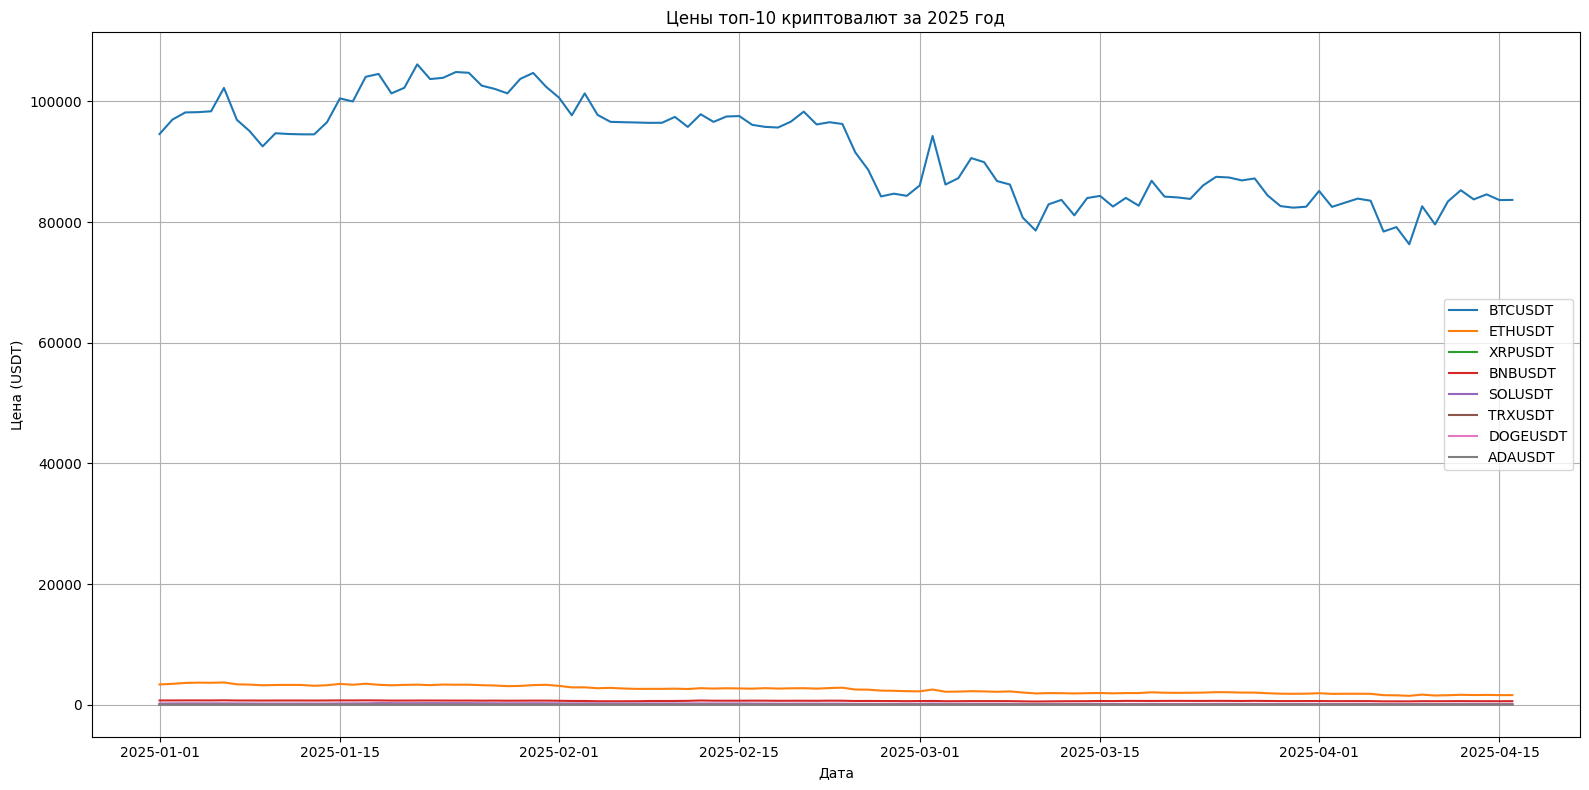

In [43]:
#3 пункт - Анализ данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 пункт Загружаем ранее сохранённый CSV с ценами
df = pd.read_csv('auto_top10_binance_prices_2025.csv', index_col=0, parse_dates=True)

# Увеличим размер графиков
plt.figure(figsize=(16, 8))

# Строим графики цен для всех криптовалют
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Цены топ-10 криптовалют за 2025 год')
plt.xlabel('Дата')
plt.ylabel('Цена (USDT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

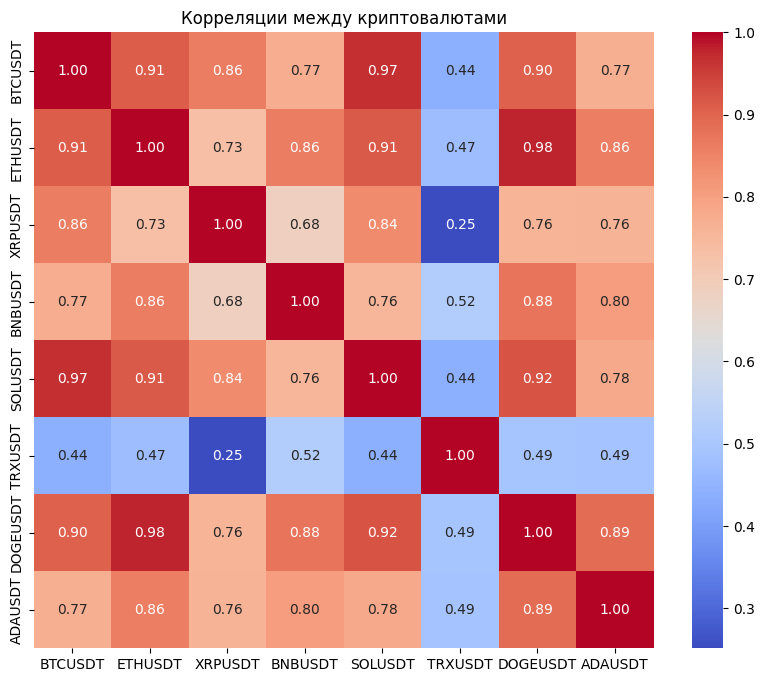

In [44]:
# Корреляционная матрица
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляции между криптовалютами")
plt.show()

In [23]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


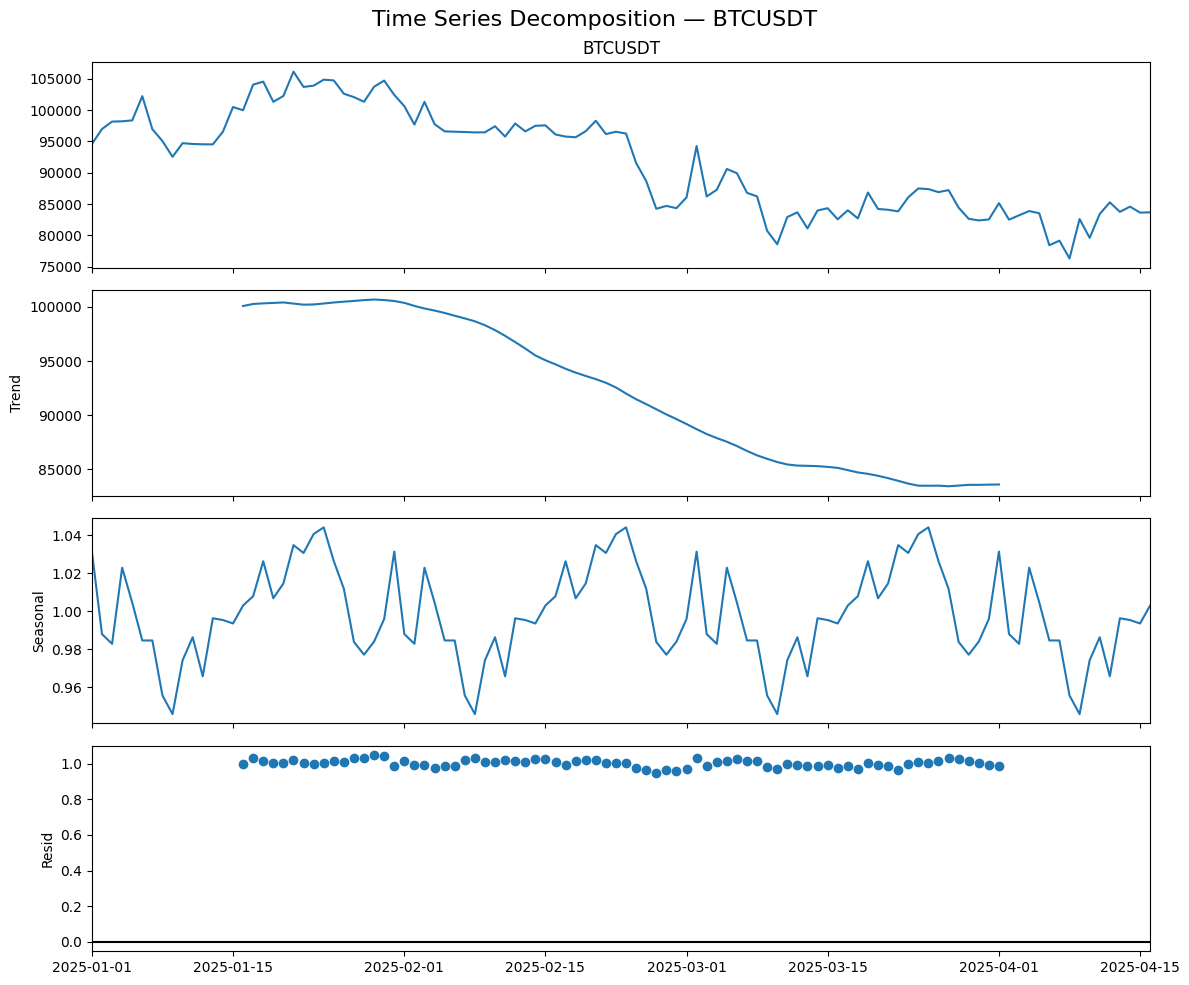

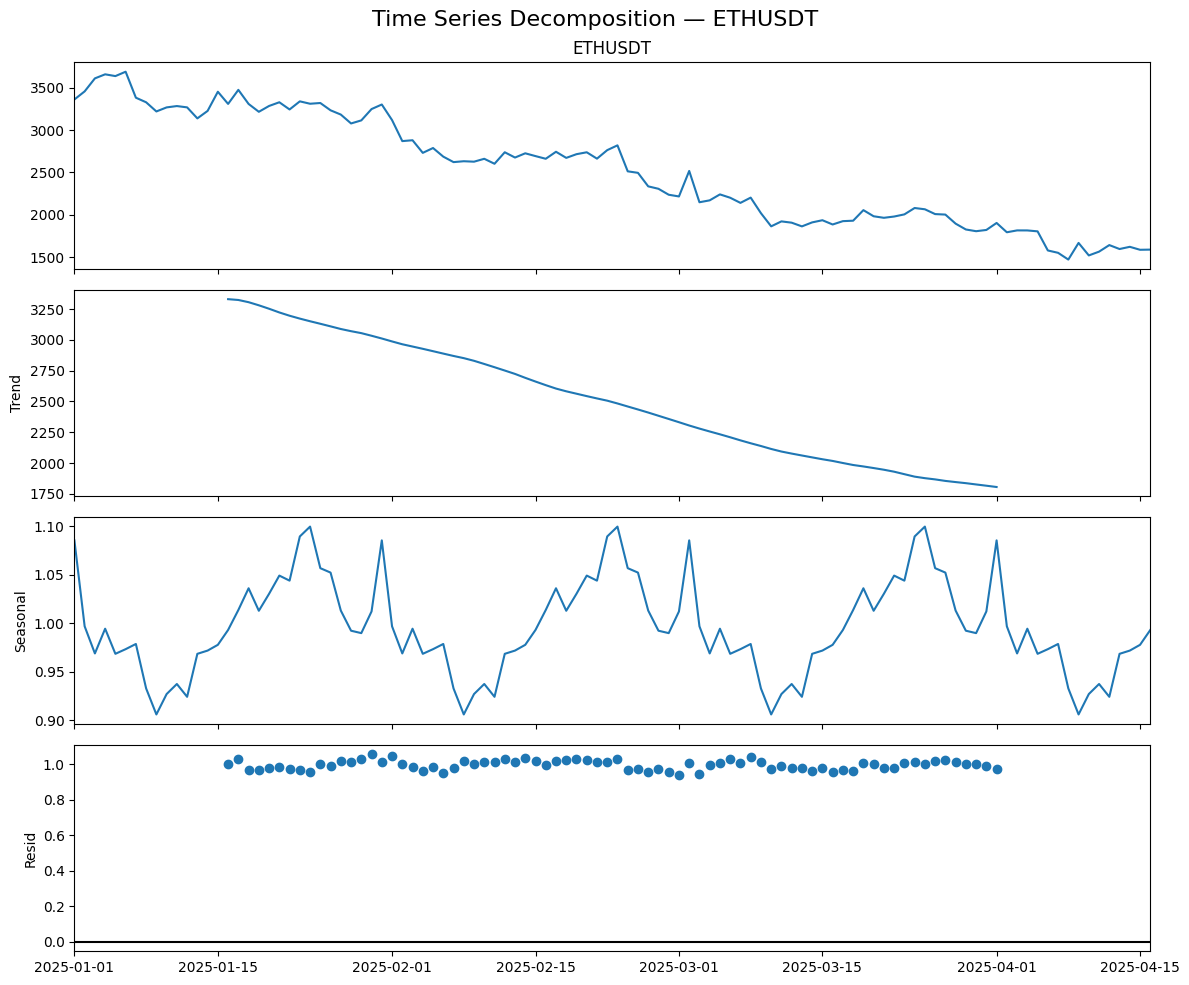

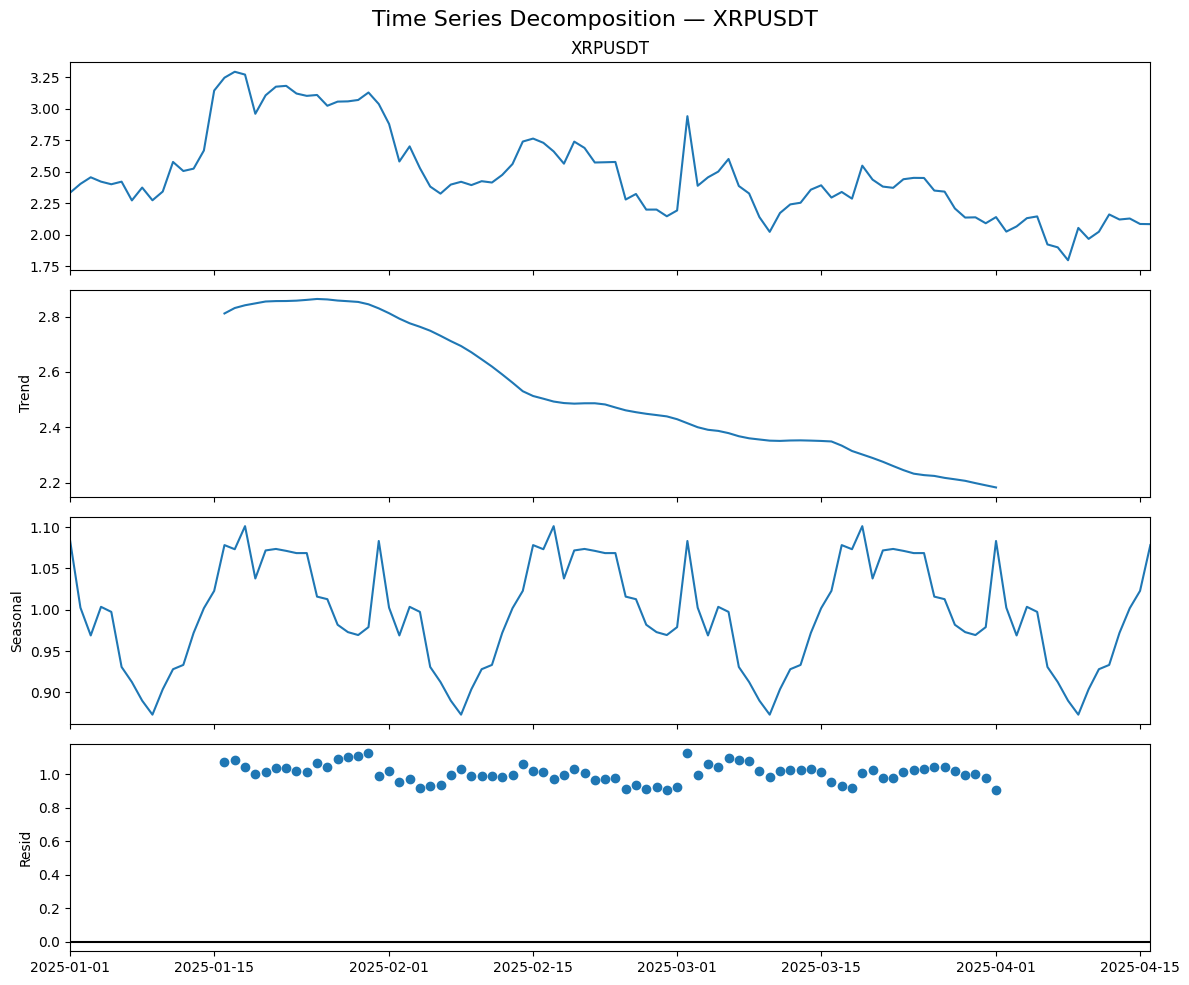

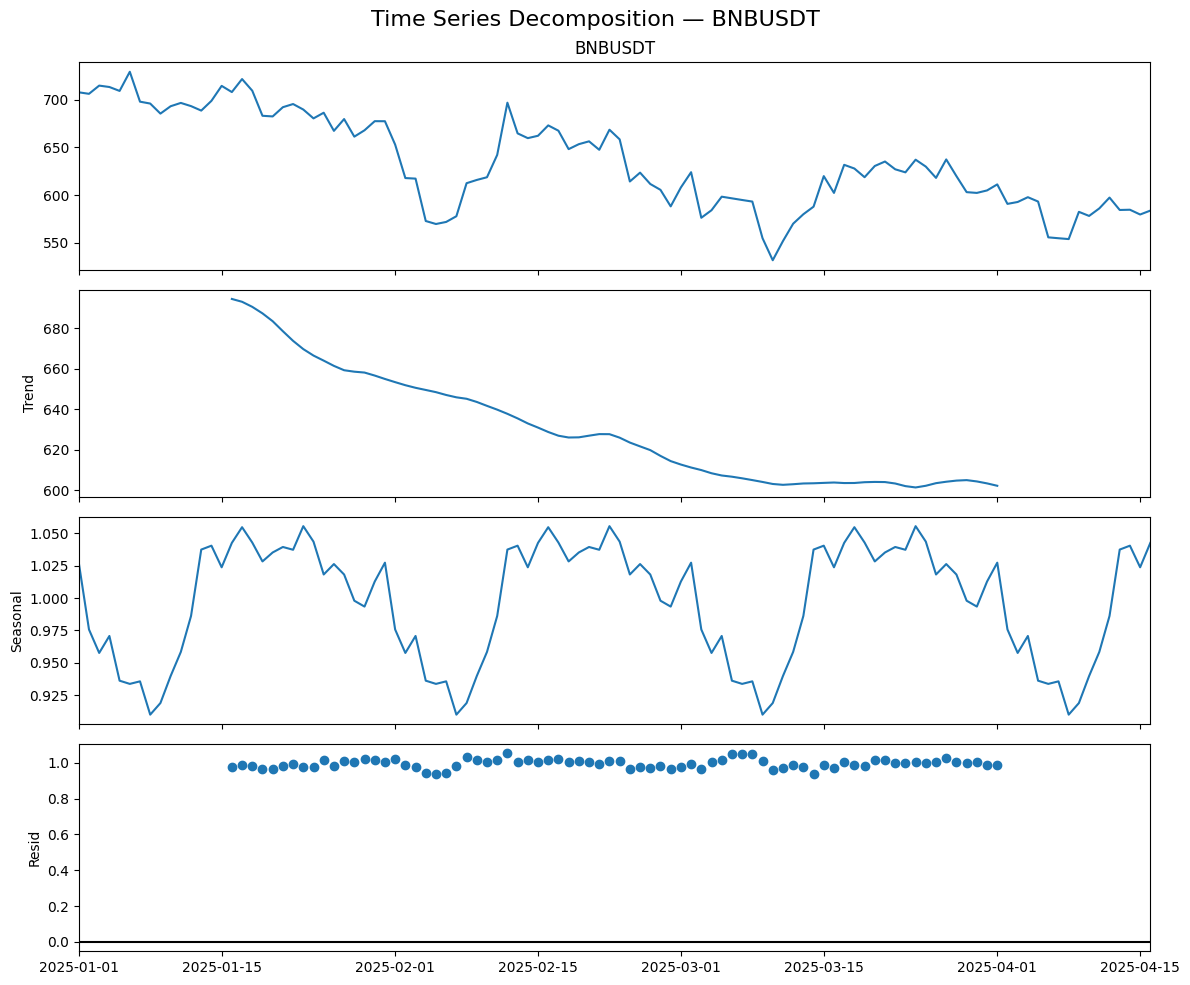

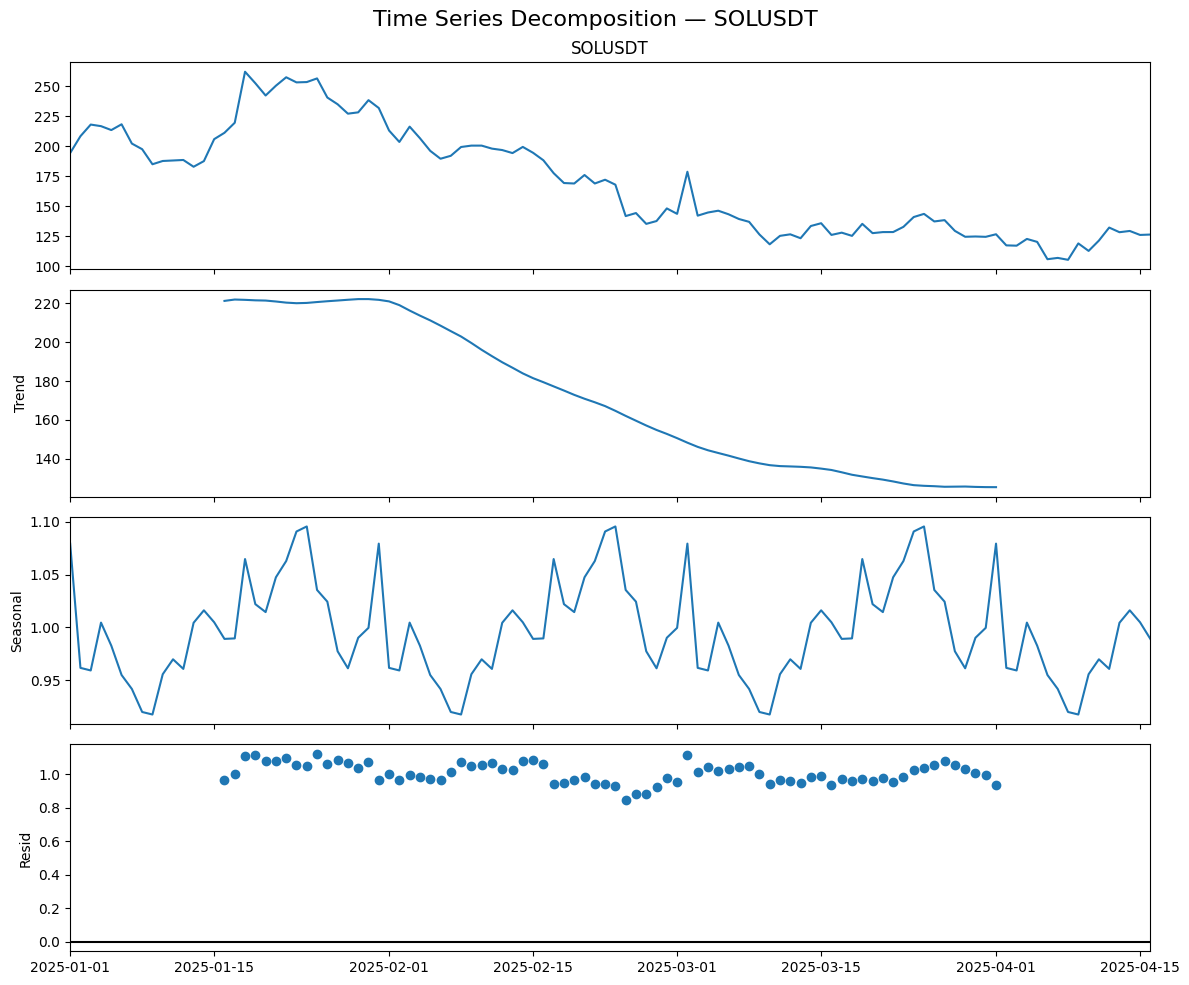

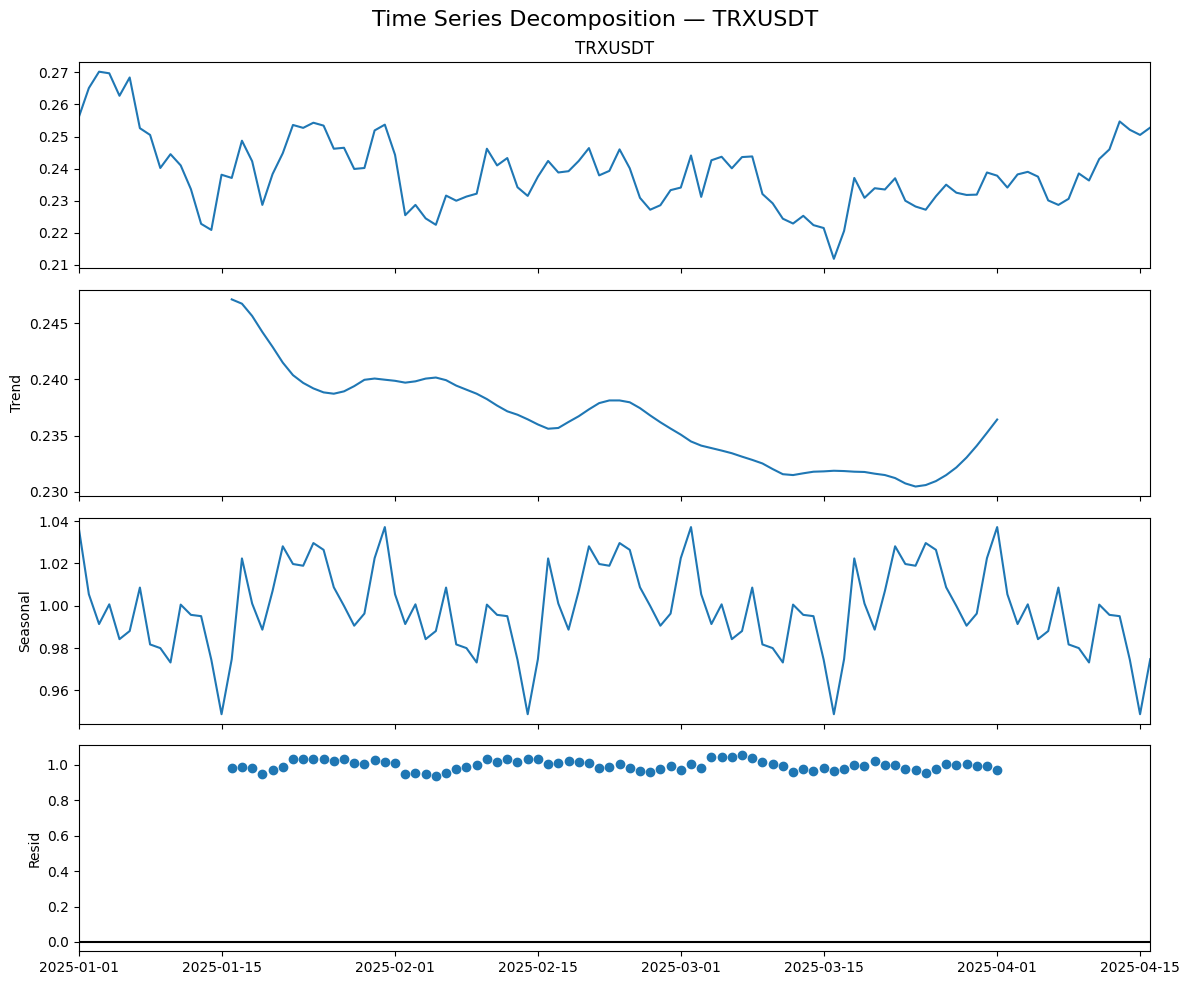

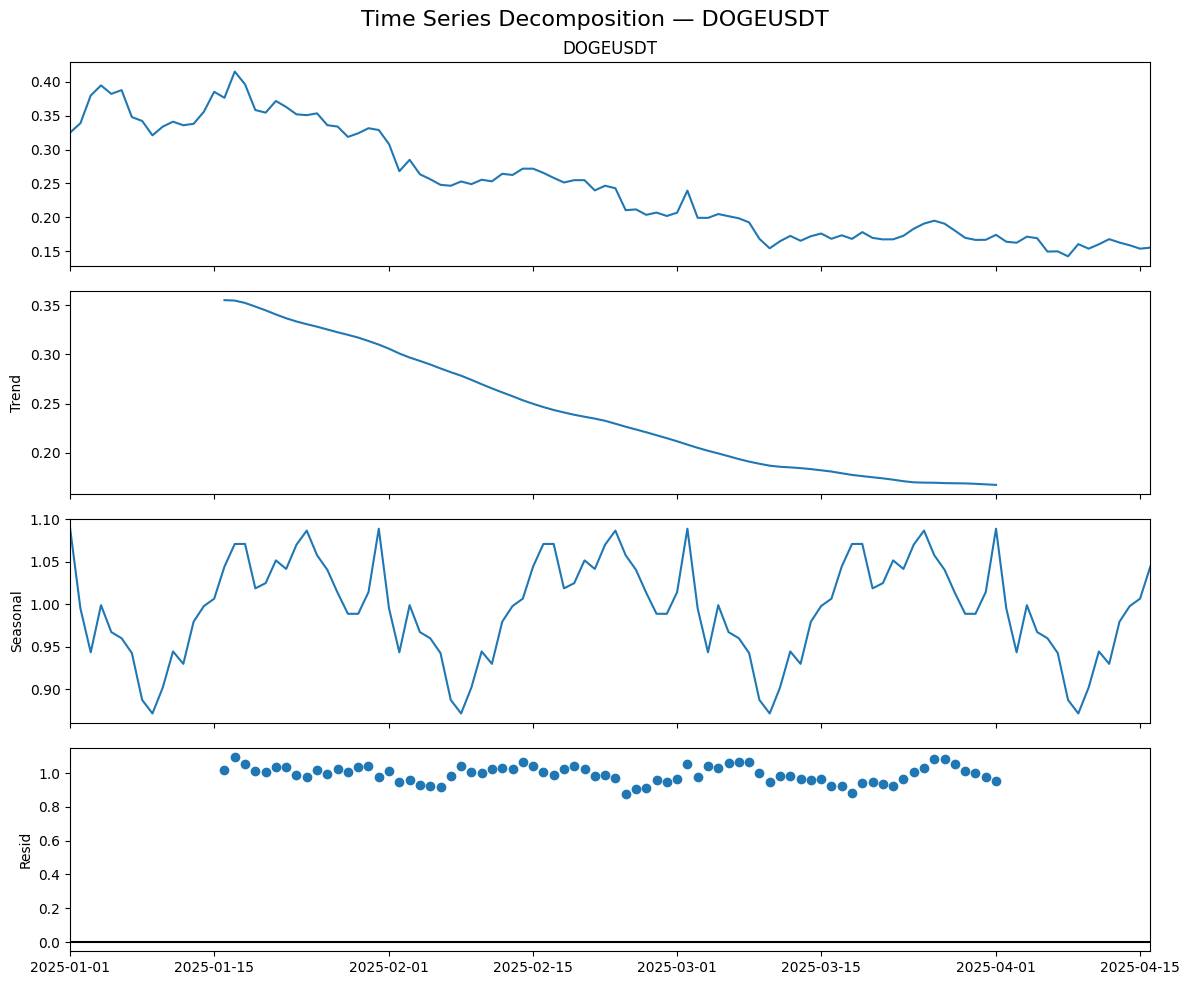

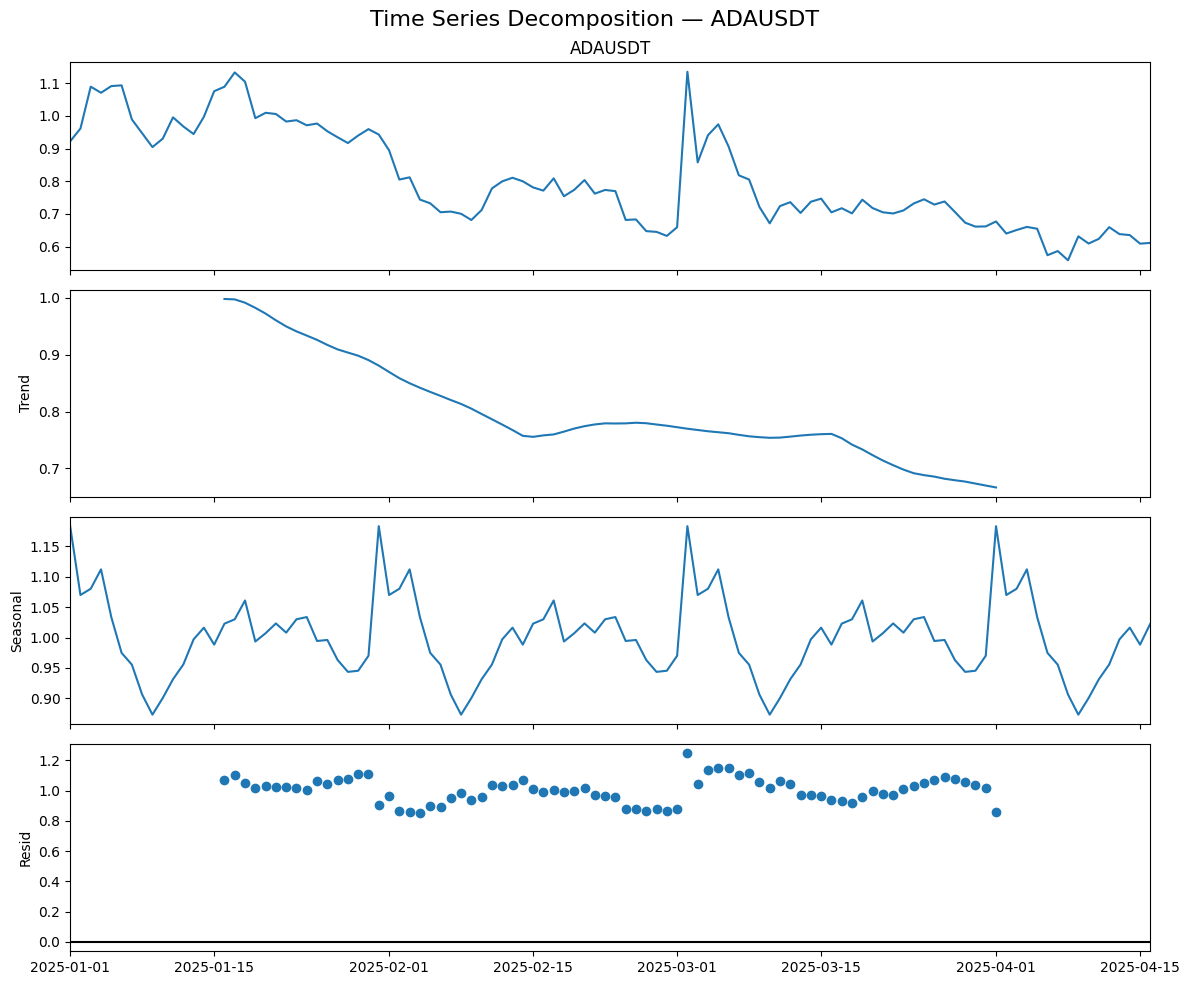

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Увеличим размер графиков
plt.rcParams.update({'figure.figsize': (12, 10)})

# Проходим по всем валютам в DataFrame
for column in df.columns:
    # Выбираем валюту
    currency = df[column]
    
    # Убедимся, что временной ряд имеет дневную частоту
    currency = currency.asfreq('D')
    
    # Разложение временного ряда
    result = seasonal_decompose(currency, model='multiplicative', period=30)
    #временной ряд предполагается как результат умножения тренда, сезонности и случайных колебаний
    
    # Визуализация
    result.plot()
    plt.suptitle(f'Time Series Decomposition — {column}', fontsize=16)
    plt.tight_layout()
    plt.show()

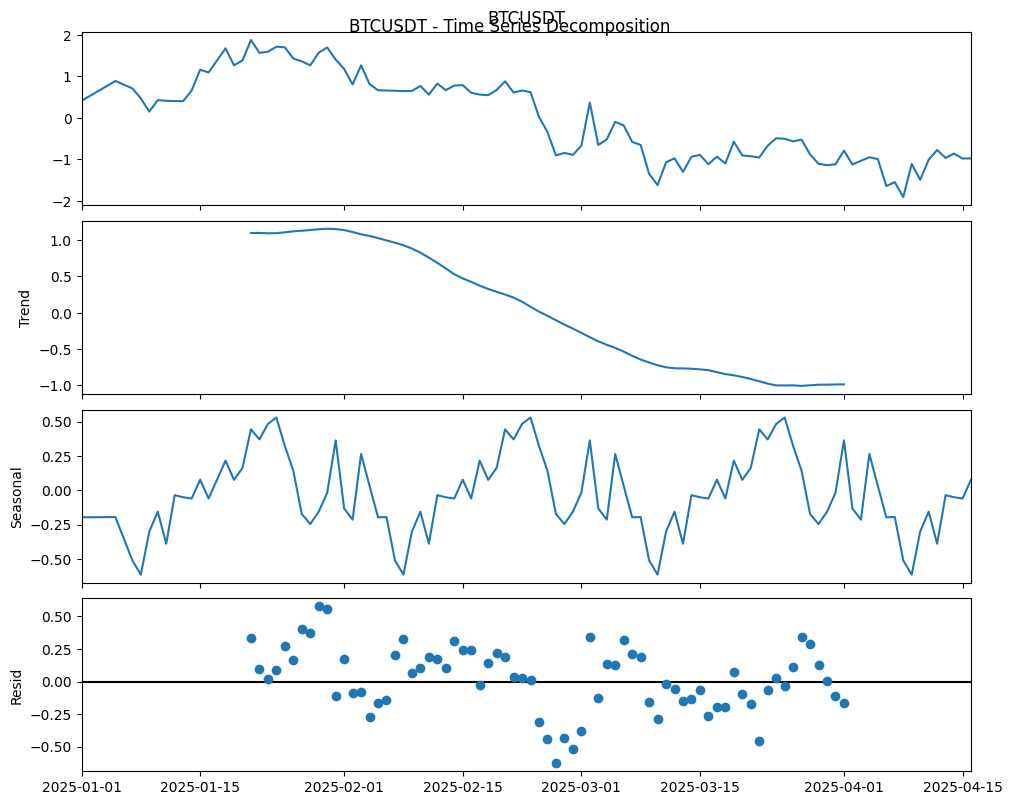

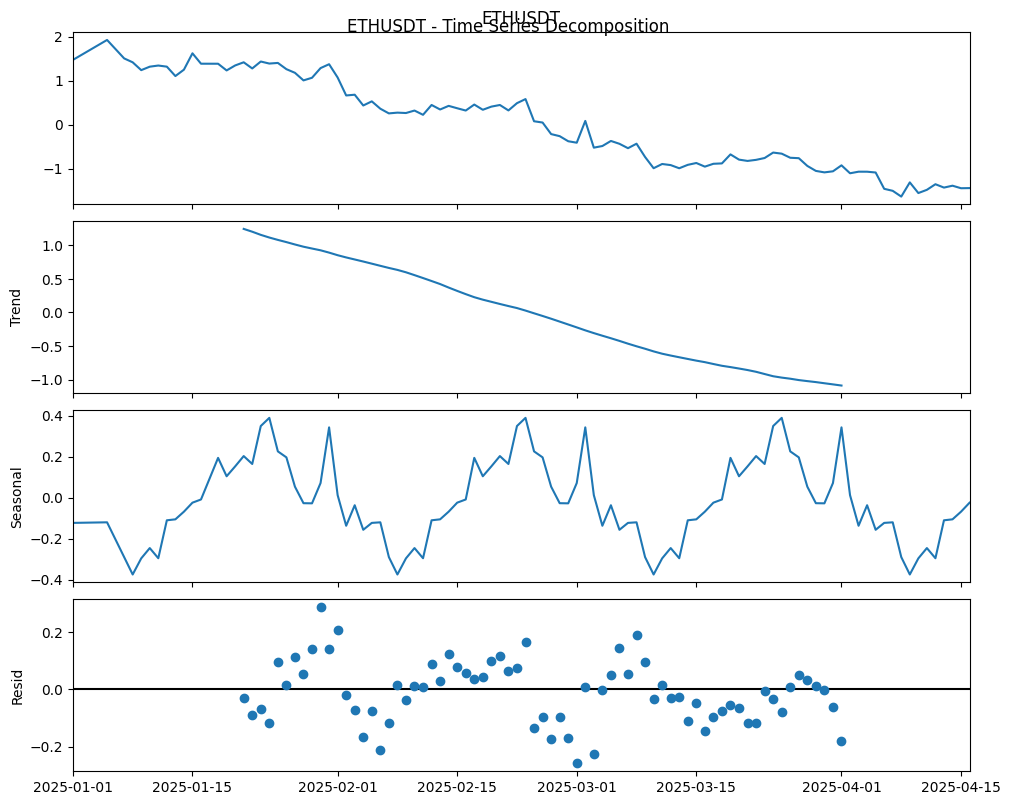

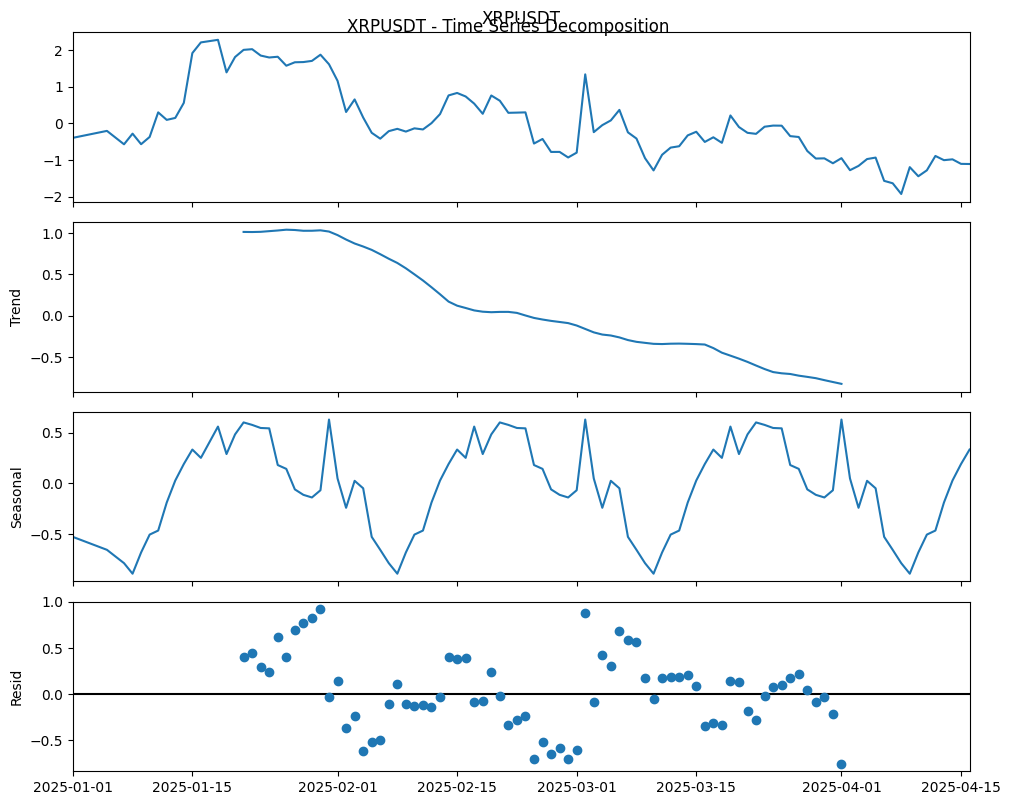

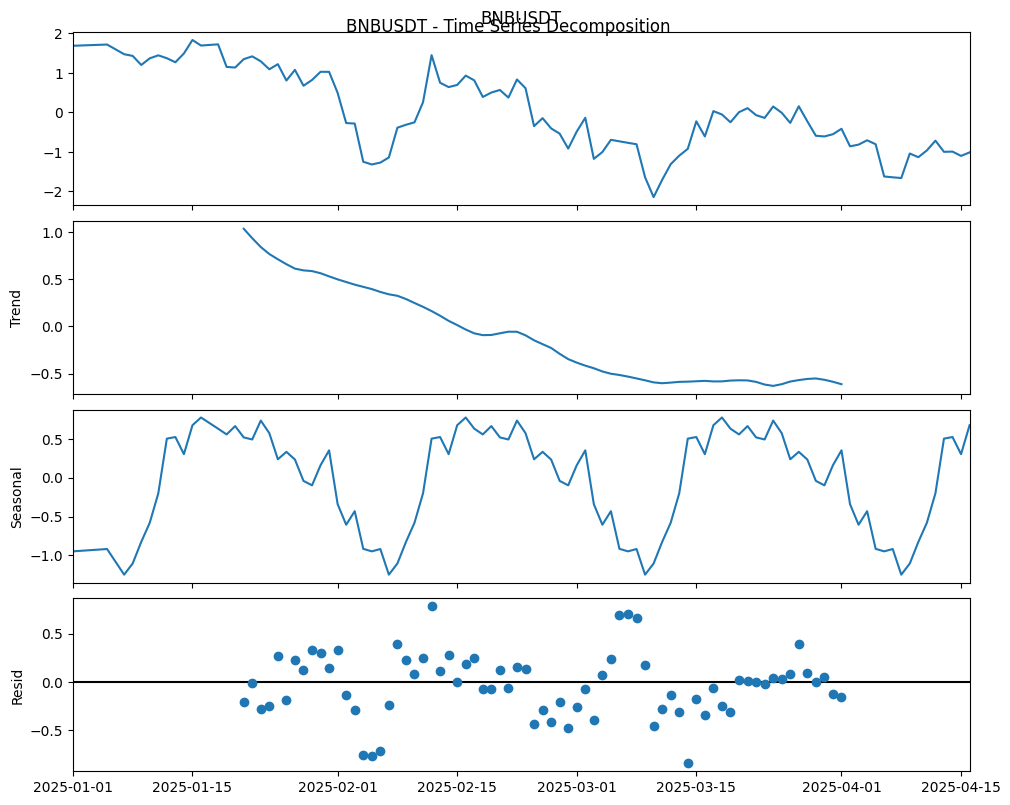

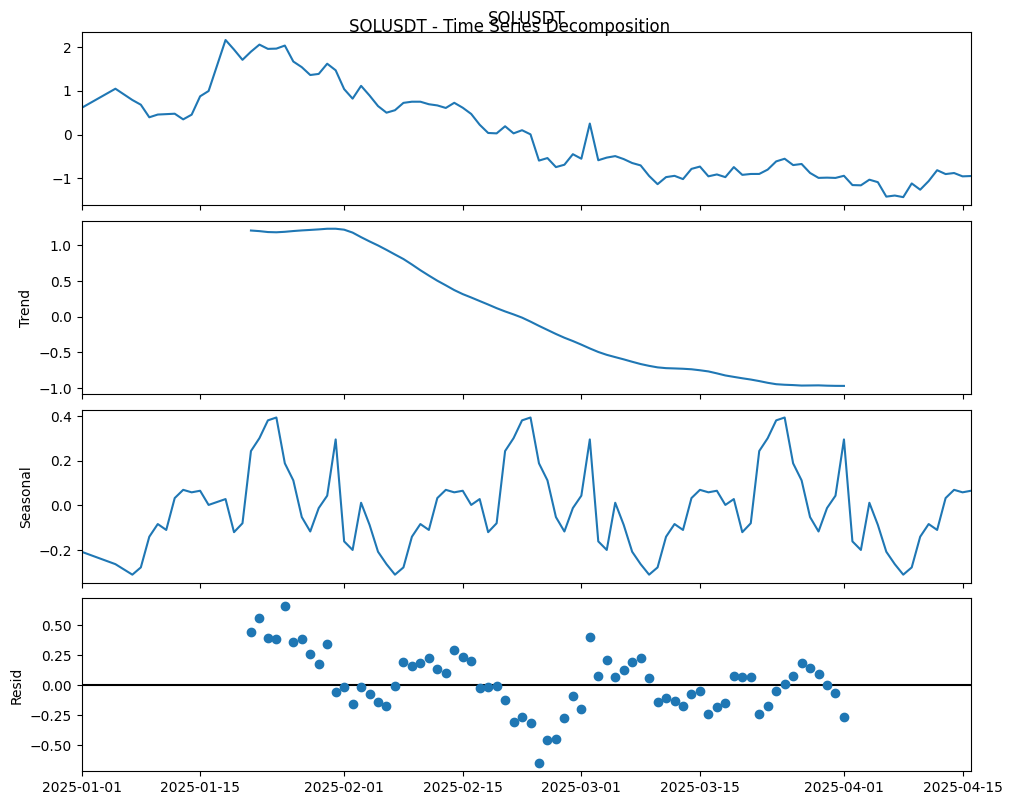

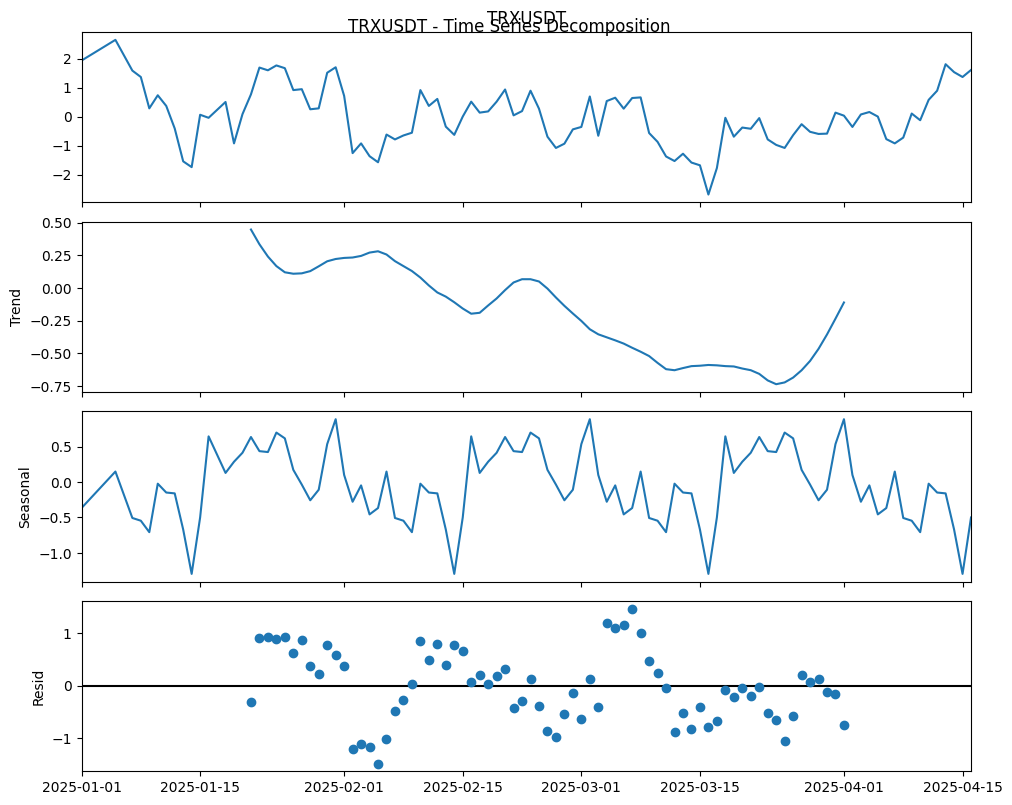

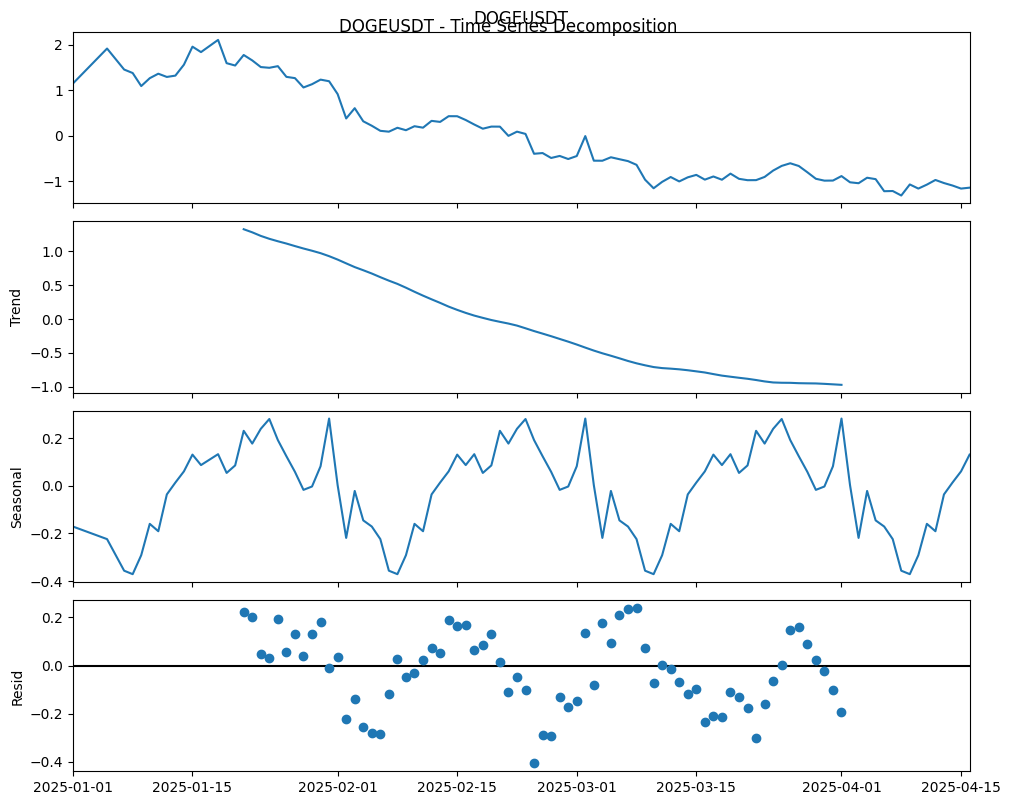

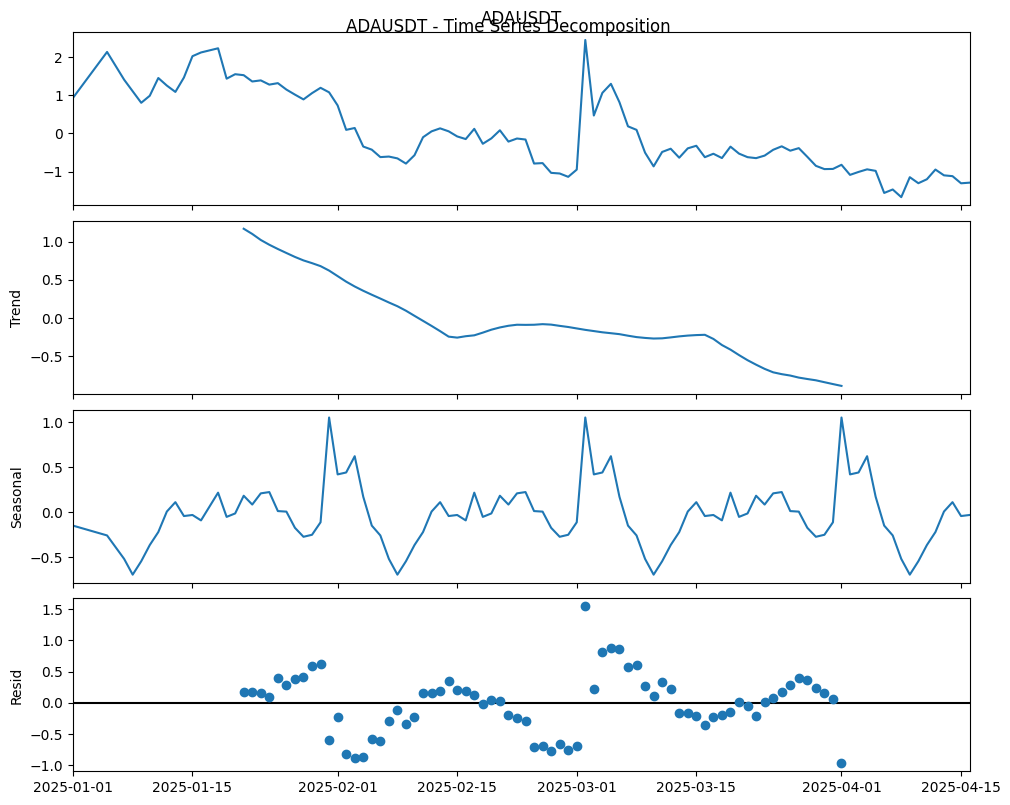

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных (замени на путь к своему файлу)
df = pd.read_csv('preprocessed_crypto_data.csv', index_col=0, parse_dates=True)

# Для каждой криптовалюты в DataFrame
for coin in df.columns:
    series = df[coin]
    
    # Декомпозиция временного ряда
    decomposition = seasonal_decompose(series, model='additive', period=30)
    #это аддитивная модель, где компоненты тренда, сезонности и остатка складываются. Это обычно используется, если изменения во времени имеют постоянную амплитуду.

    # Визуализация результатов разложения
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    plt.suptitle(f'{coin} - Time Series Decomposition')
    plt.show()

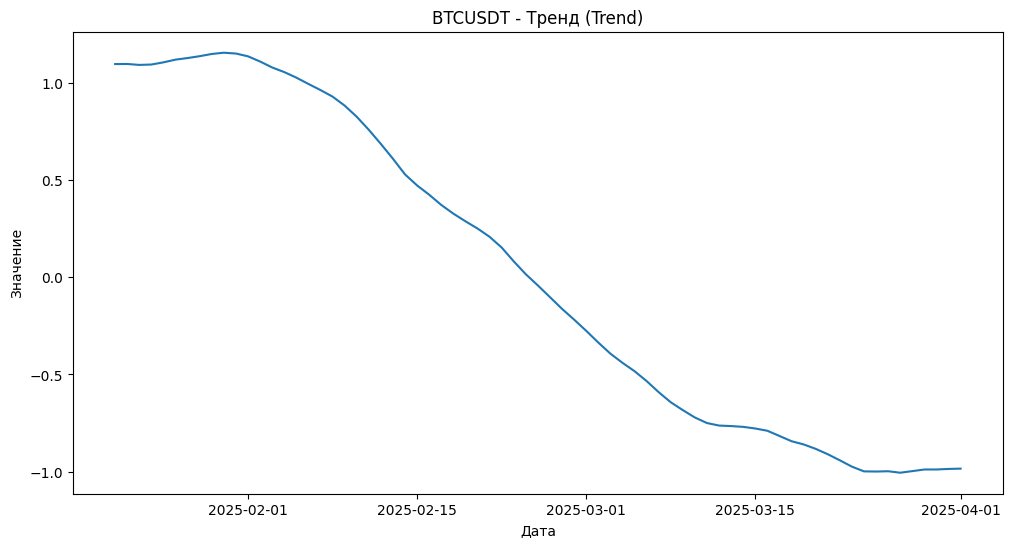

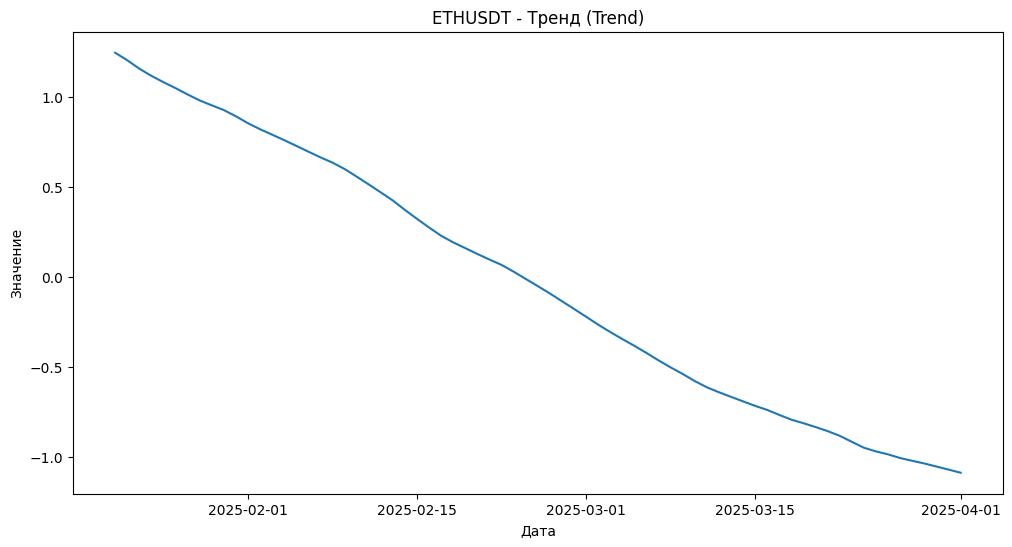

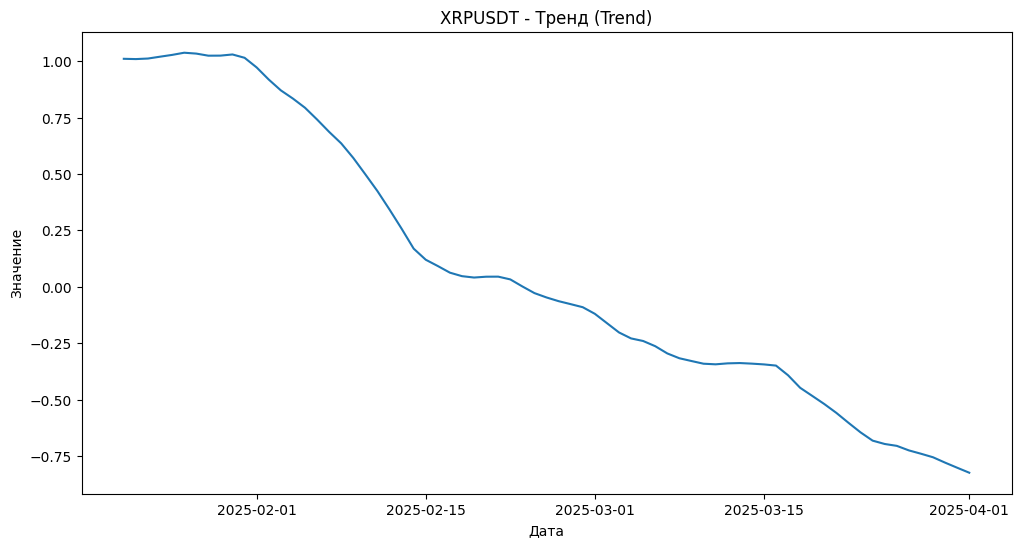

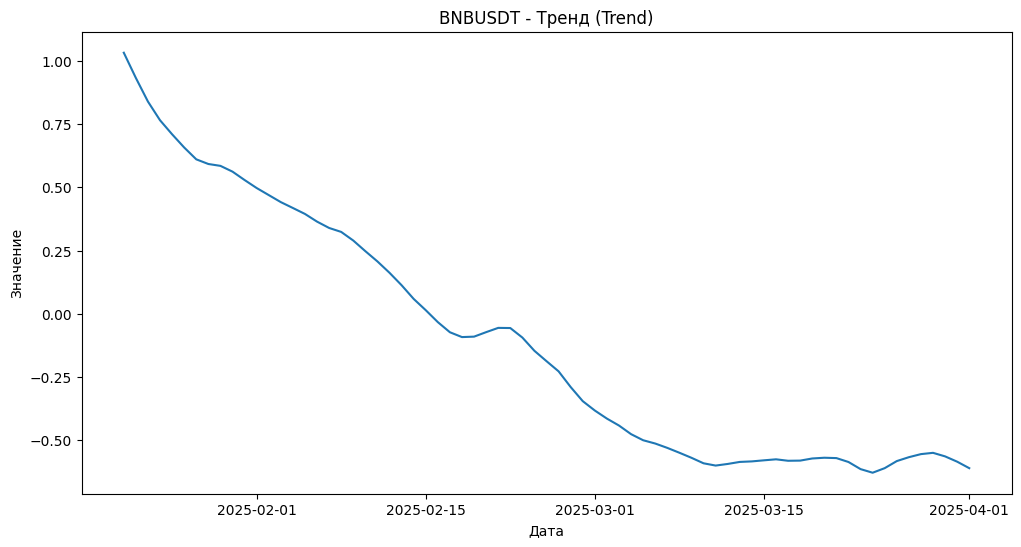

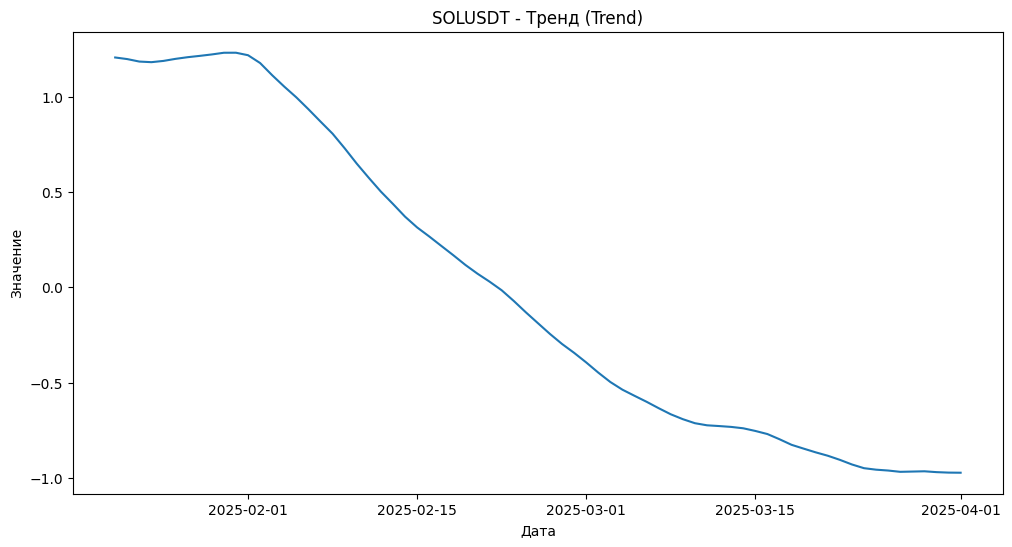

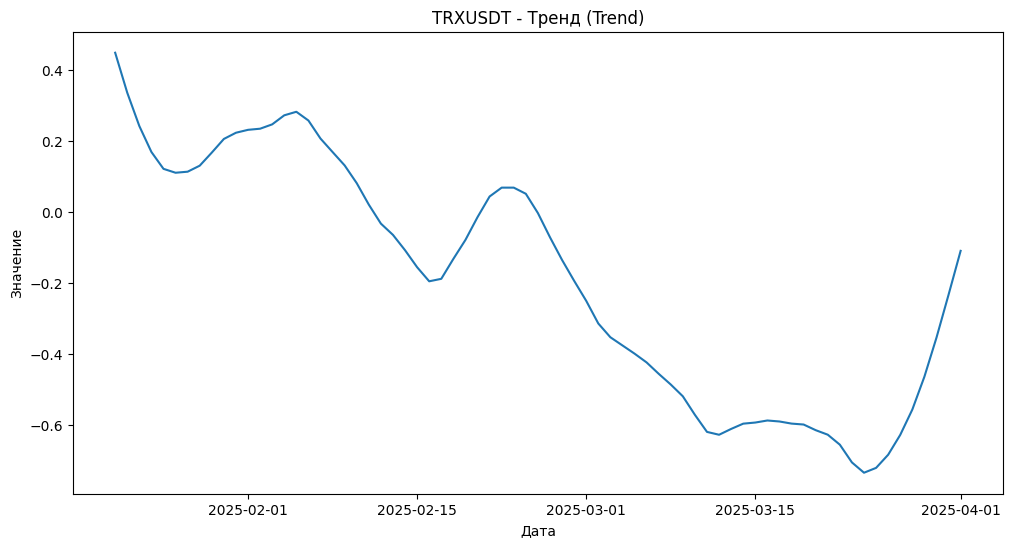

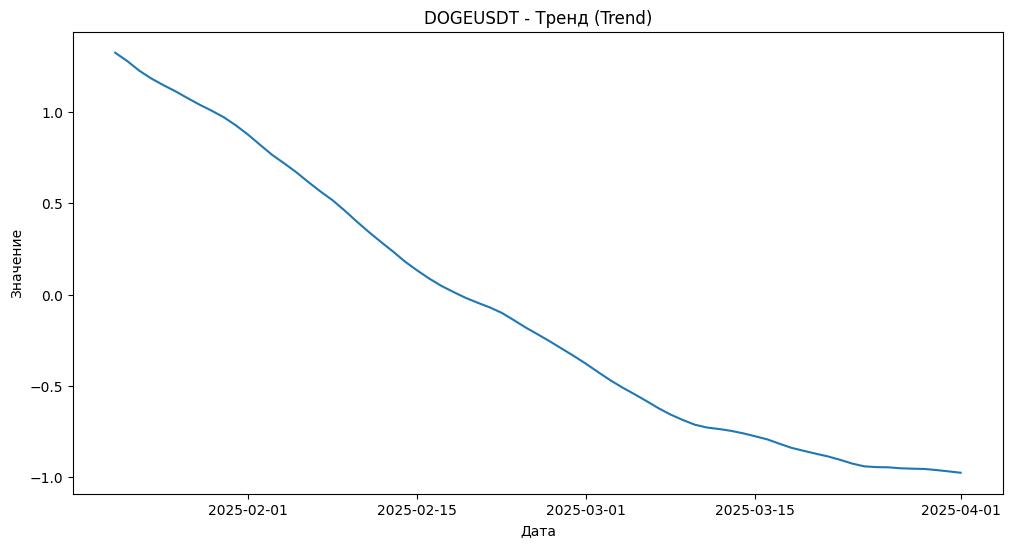

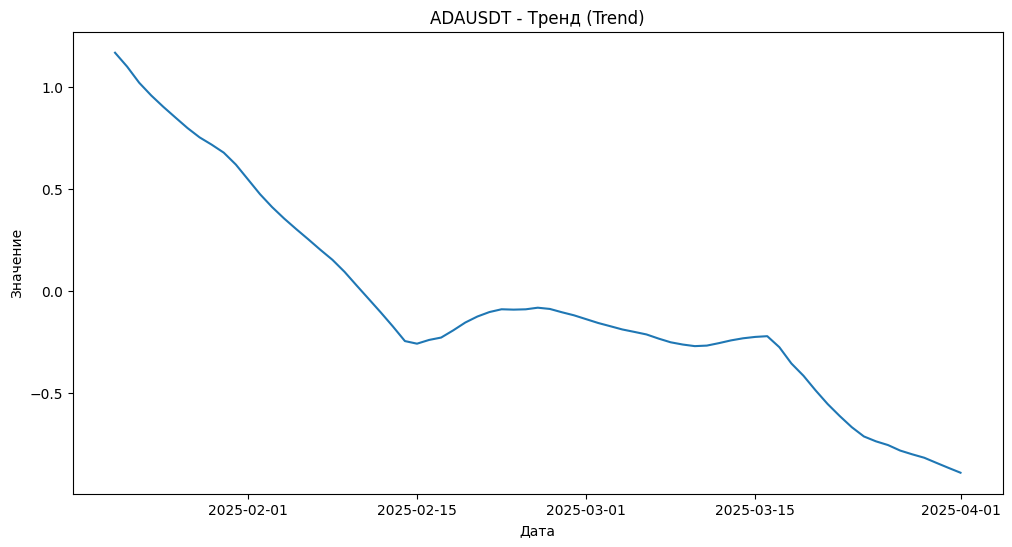

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных
df = pd.read_csv('preprocessed_crypto_data.csv', index_col=0, parse_dates=True)

# Для каждой криптовалюты в DataFrame
for coin in df.columns:
    series = df[coin]
    
    # Декомпозиция временного ряда
    decomposition = seasonal_decompose(series, model='additive', period=30)

    # Визуализация компонента тренда
    plt.figure(figsize=(12, 6))
    plt.plot(decomposition.trend)
    plt.title(f'{coin} - Тренд (Trend)')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.show()

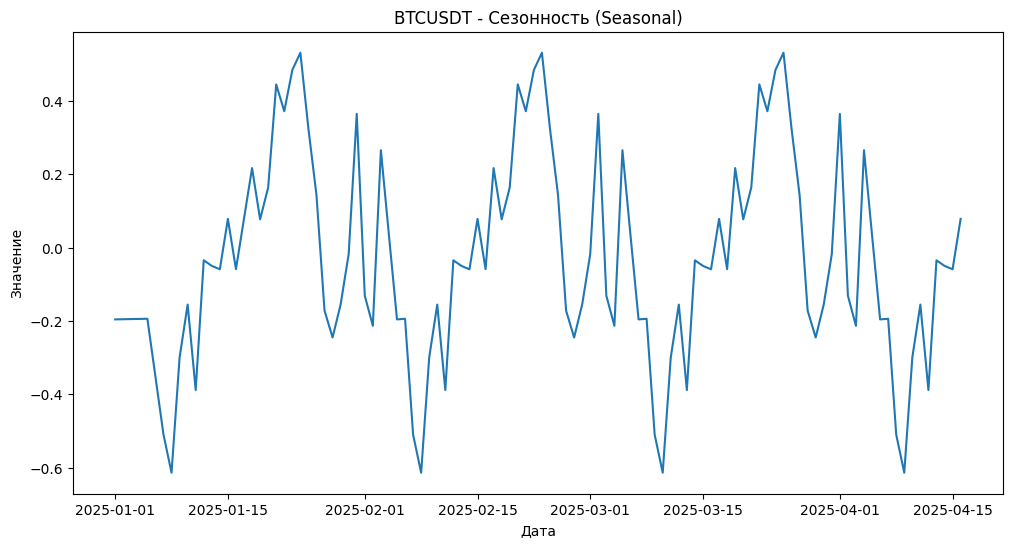

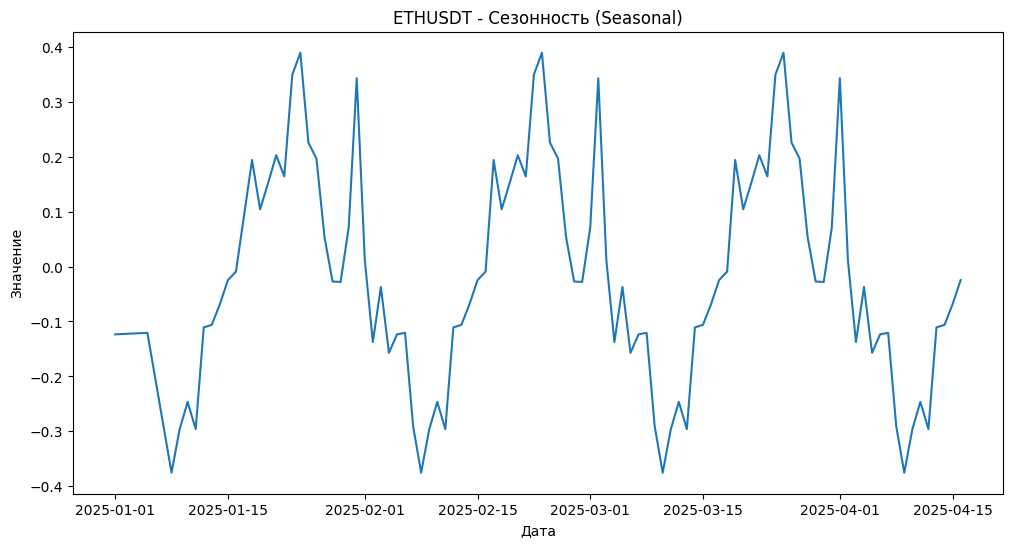

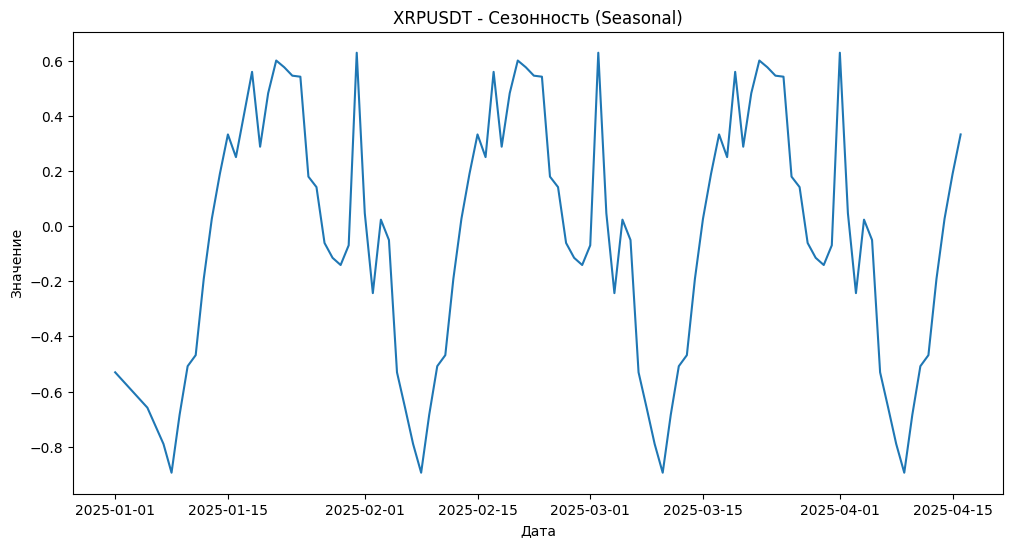

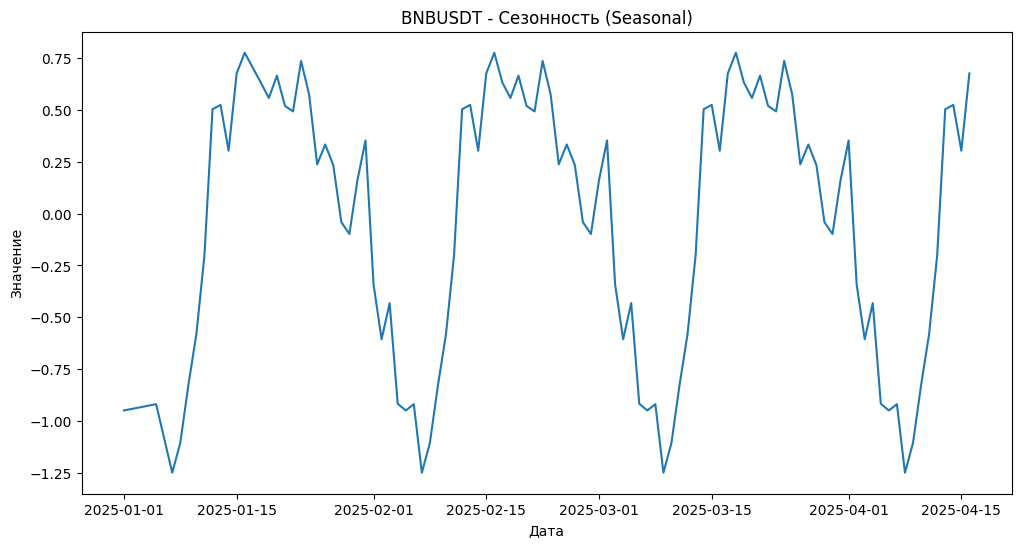

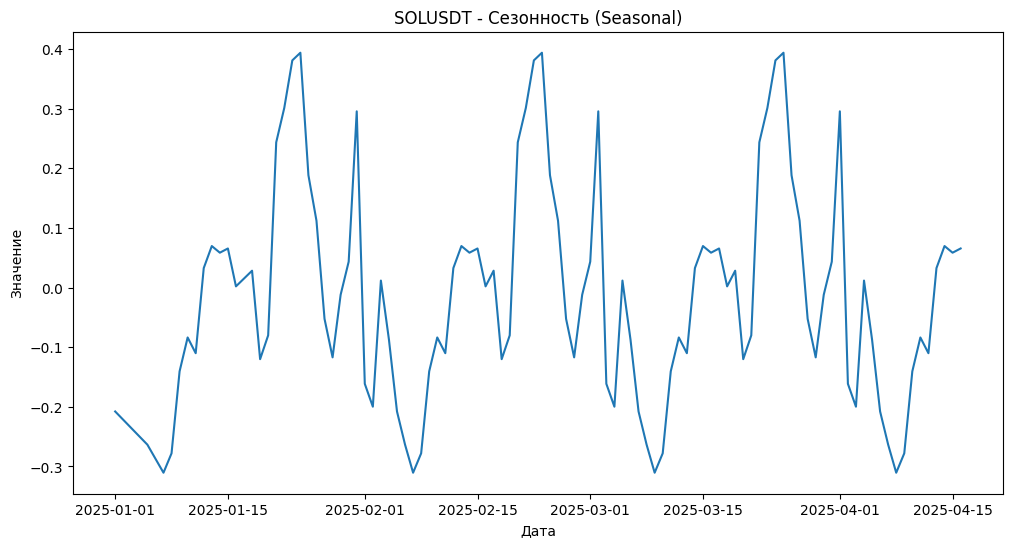

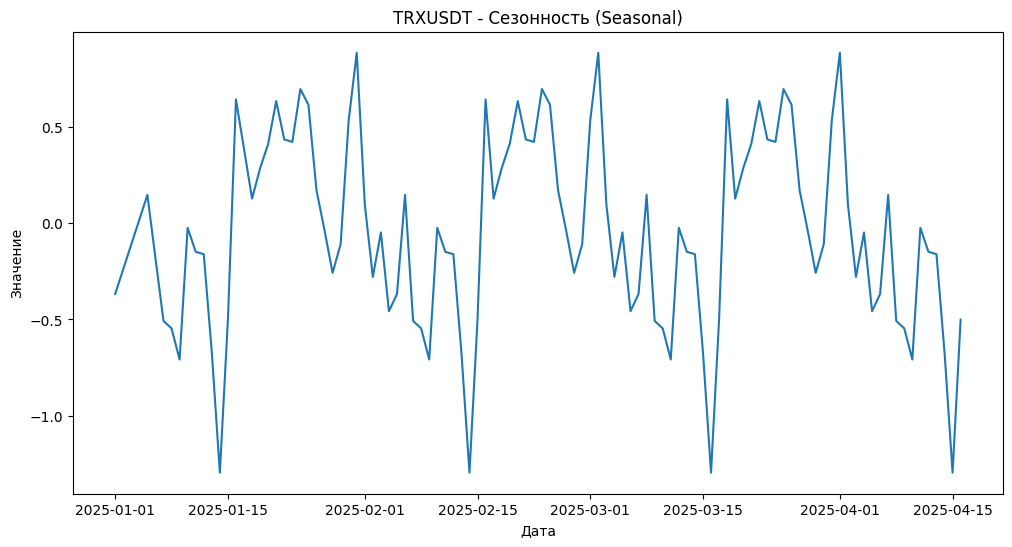

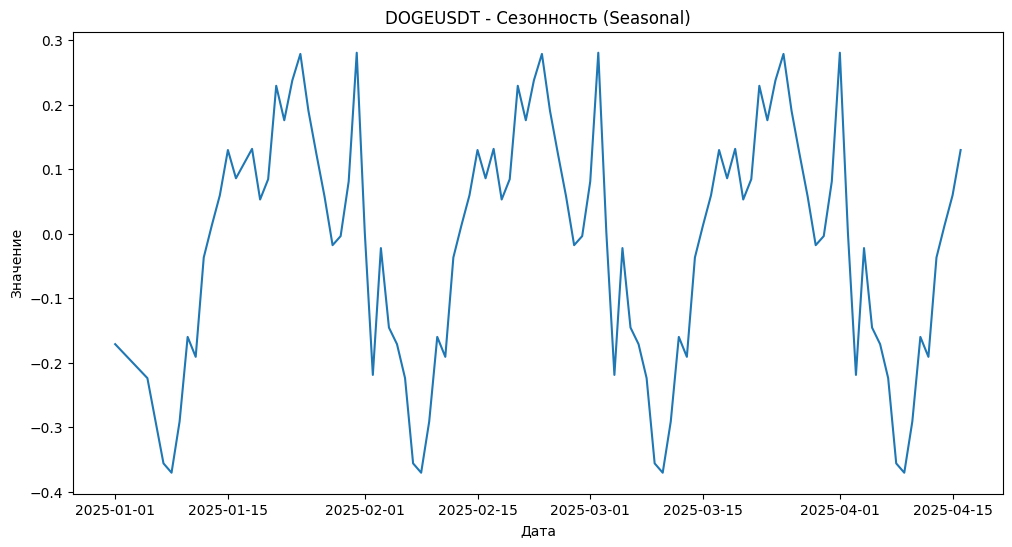

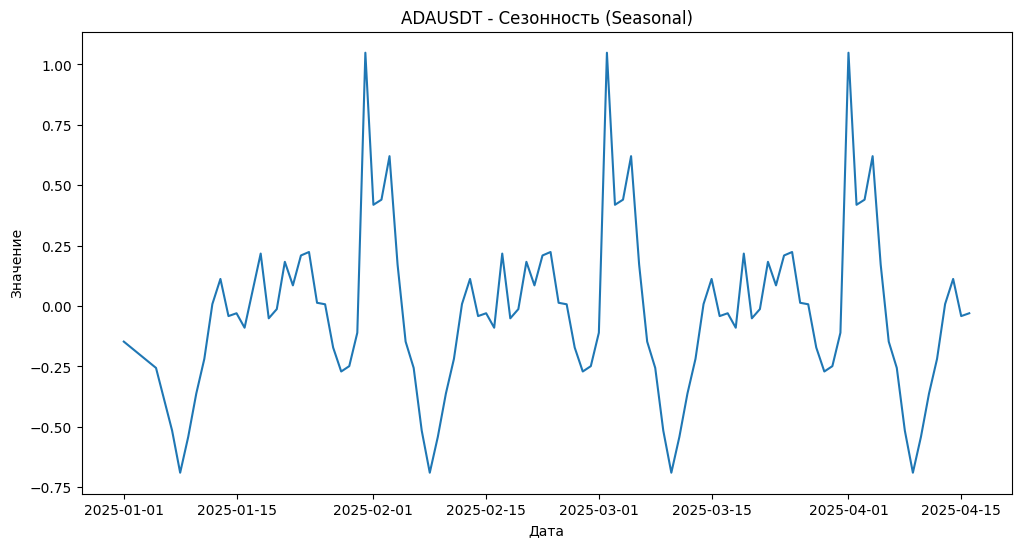

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных
df = pd.read_csv('preprocessed_crypto_data.csv', index_col=0, parse_dates=True)

# Для каждой криптовалюты в DataFrame
for coin in df.columns:
    series = df[coin]
    
    # Декомпозиция временного ряда
    decomposition = seasonal_decompose(series, model='additive', period=30)

    # Визуализация компонента сезонности
    plt.figure(figsize=(12, 6))
    plt.plot(decomposition.seasonal)
    plt.title(f'{coin} - Сезонность (Seasonal)')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.show()


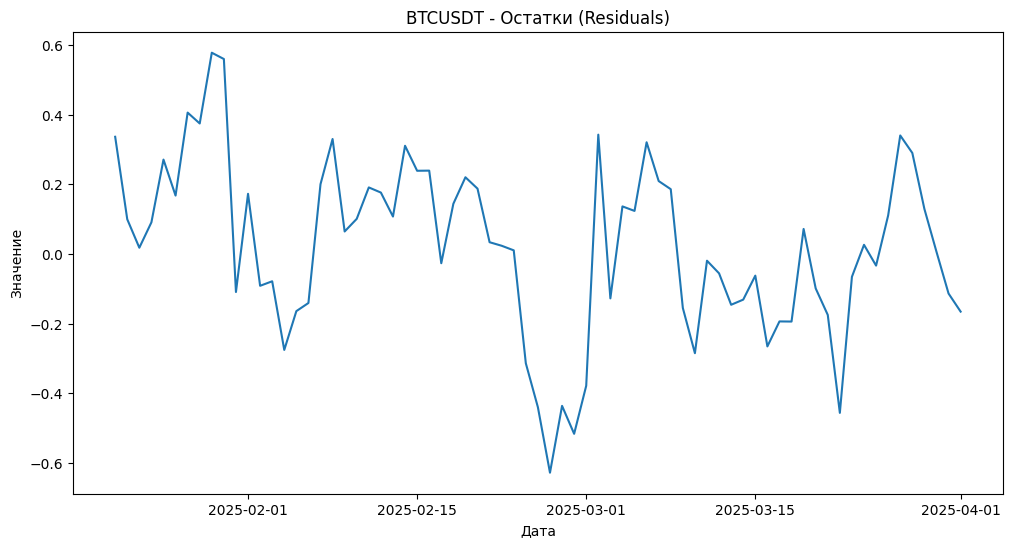

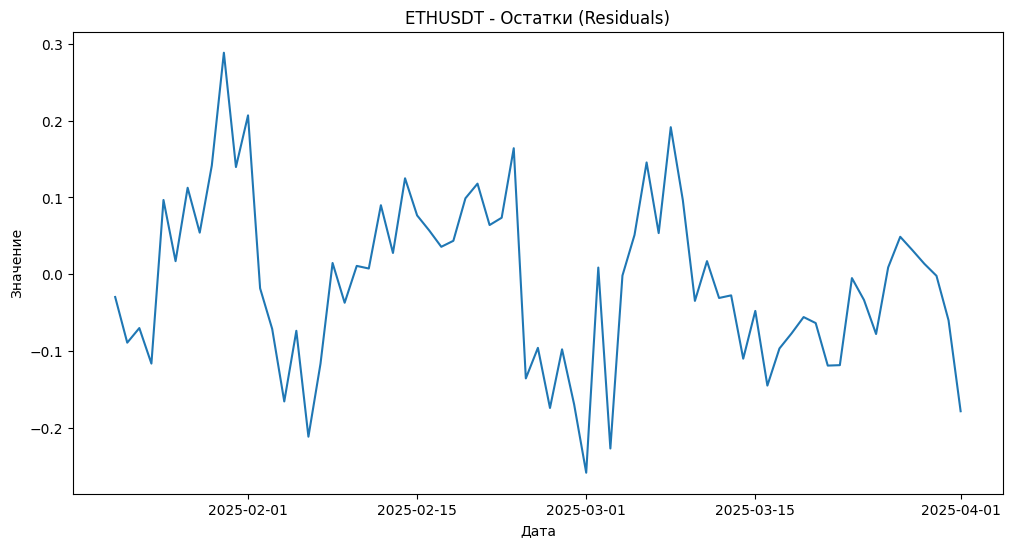

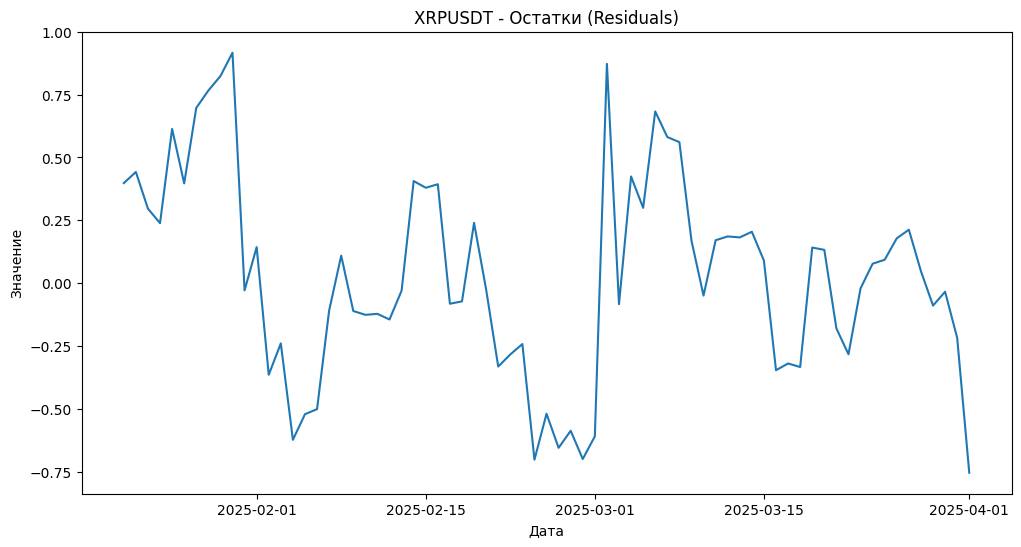

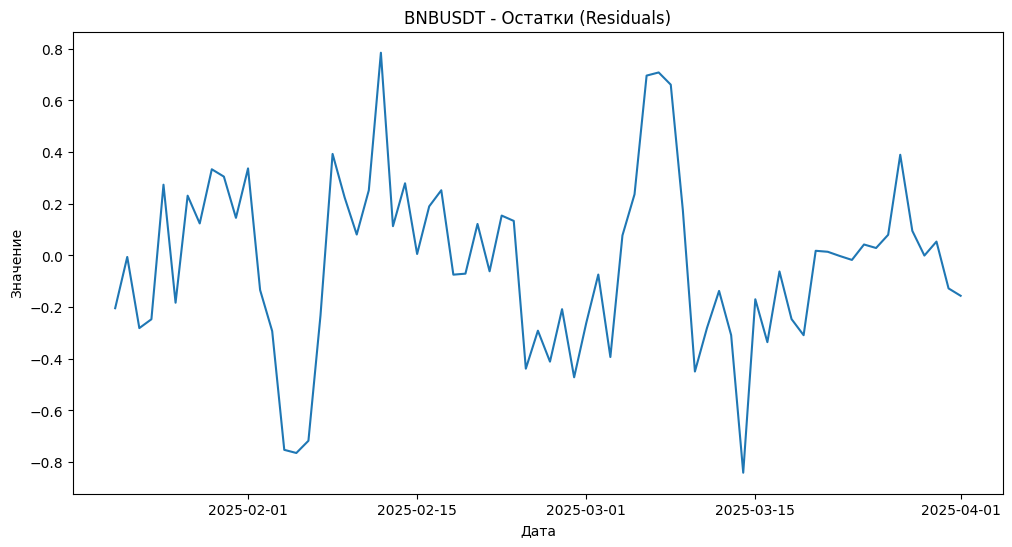

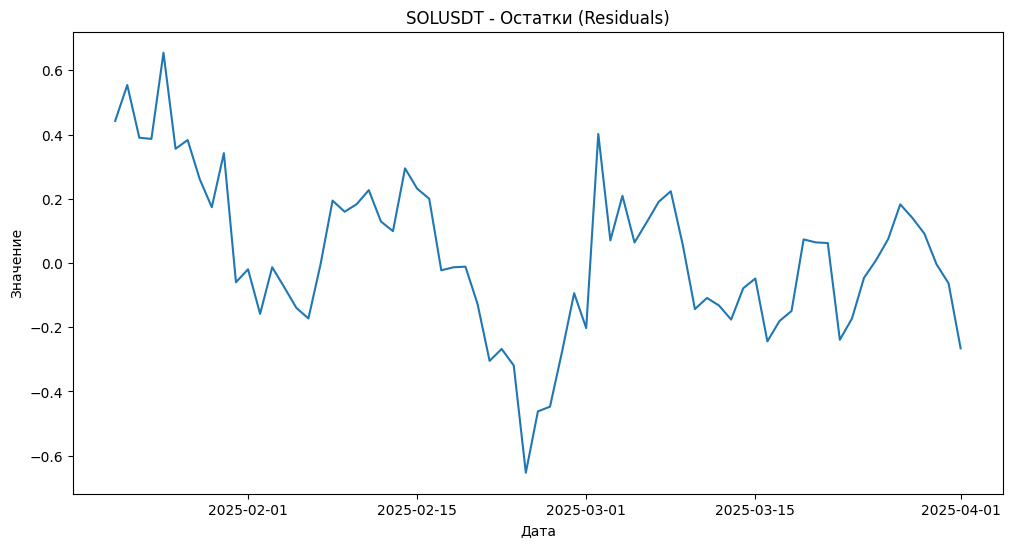

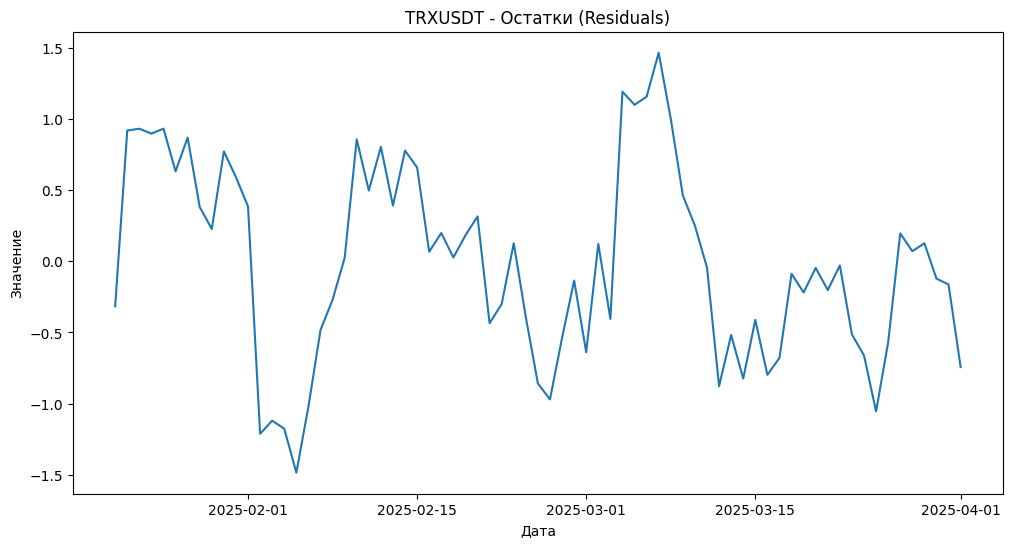

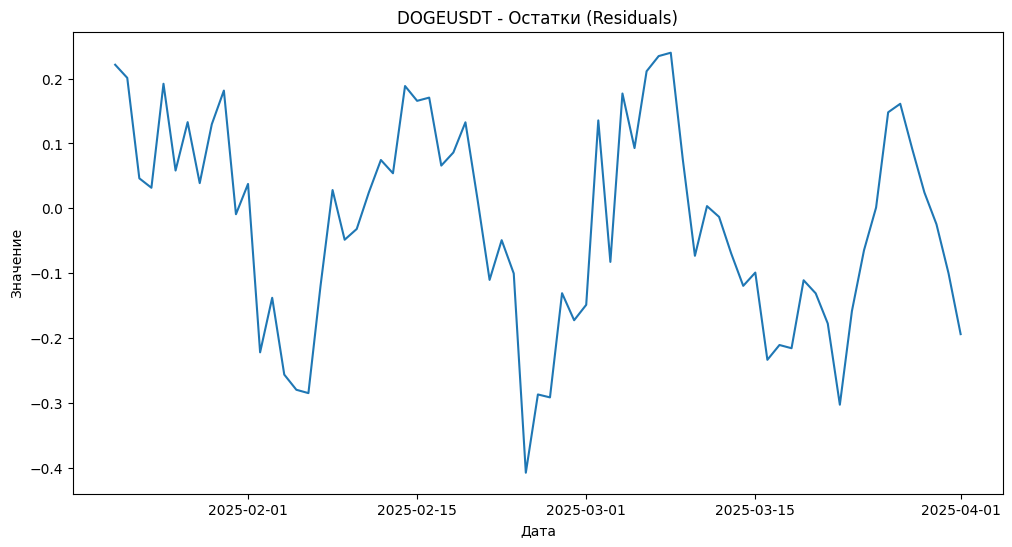

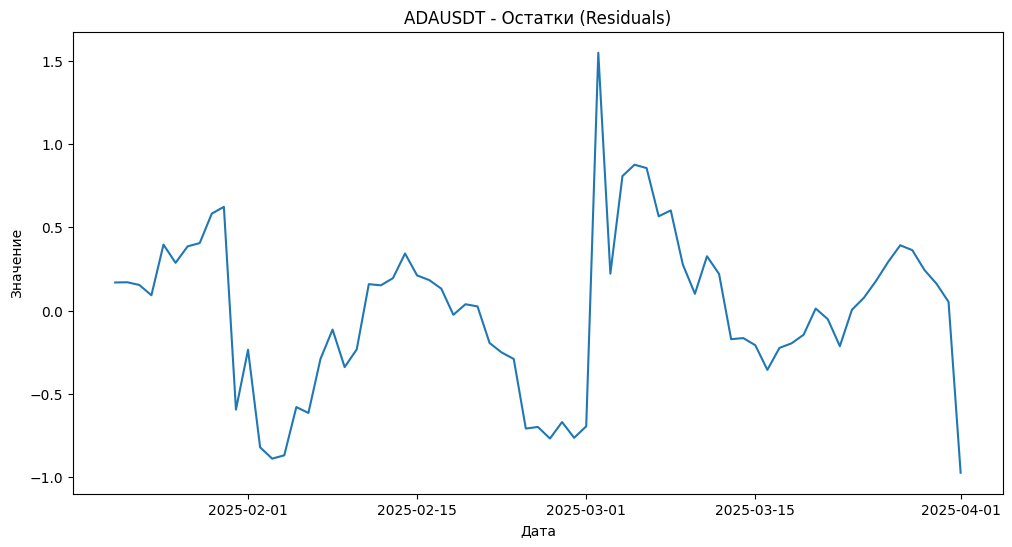

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных
df = pd.read_csv('preprocessed_crypto_data.csv', index_col=0, parse_dates=True)

# Для каждой криптовалюты в DataFrame
for coin in df.columns:
    series = df[coin]
    
    # Декомпозиция временного ряда
    decomposition = seasonal_decompose(series, model='additive', period=30)

    # Визуализация компонента остатков
    plt.figure(figsize=(12, 6))
    plt.plot(decomposition.resid)
    plt.title(f'{coin} - Остатки (Residuals)')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.show()


<Figure size 1200x600 with 0 Axes>

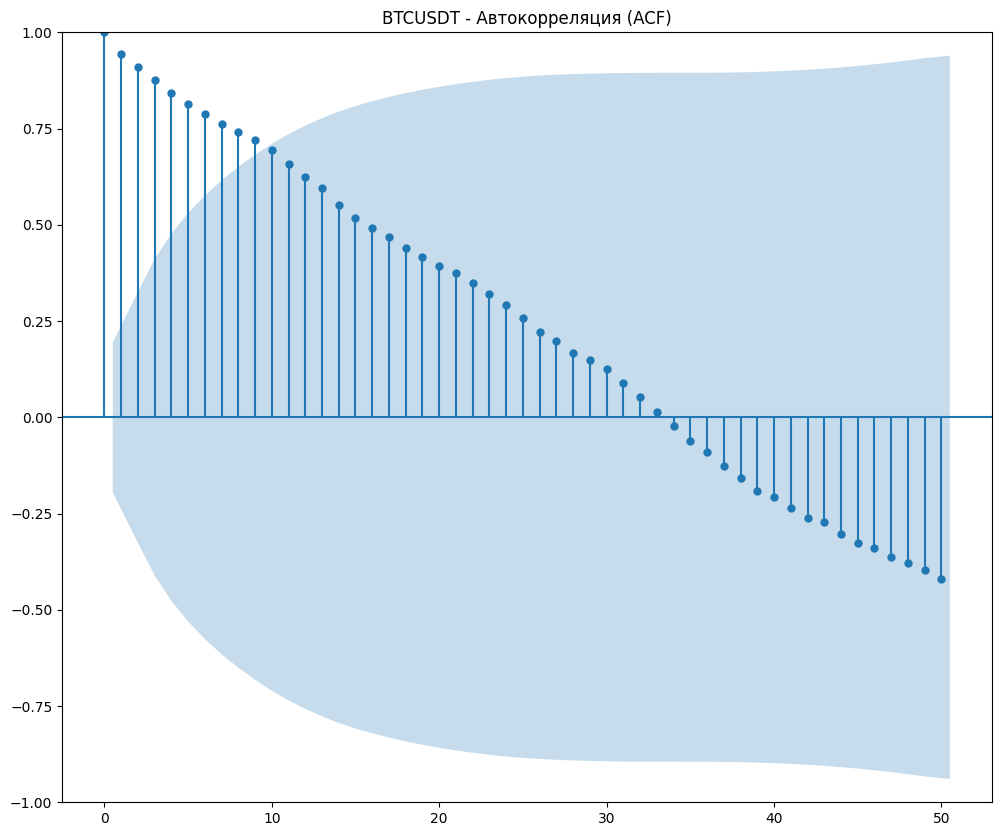

<Figure size 1200x600 with 0 Axes>

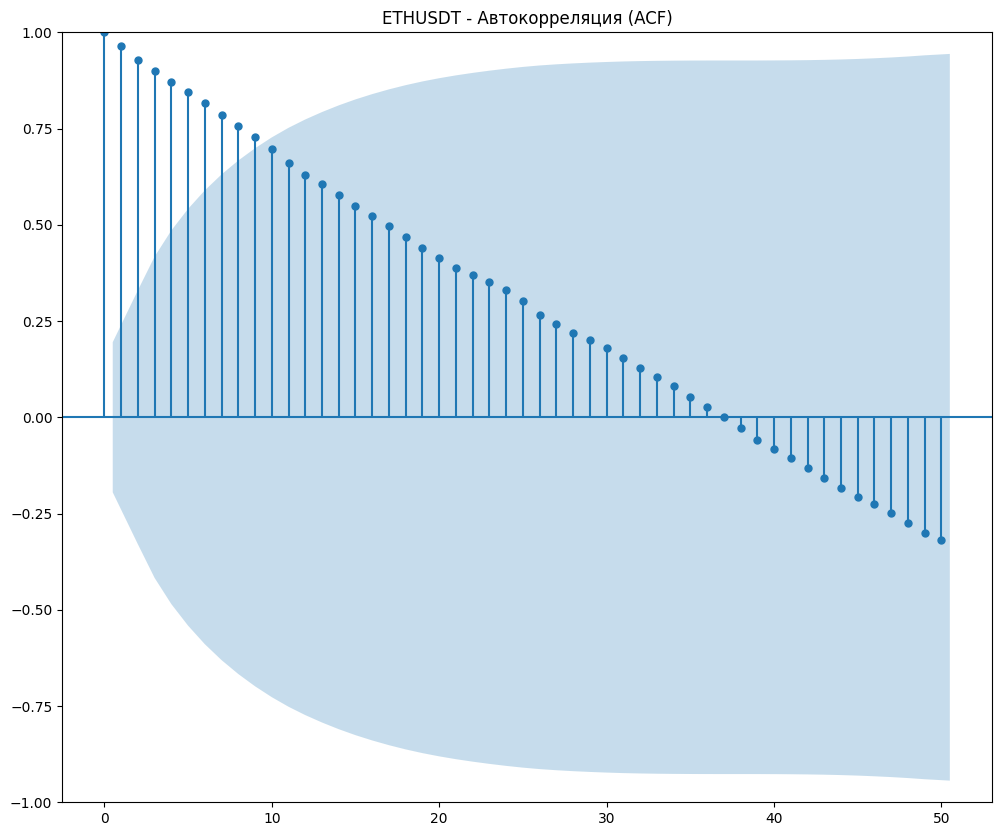

<Figure size 1200x600 with 0 Axes>

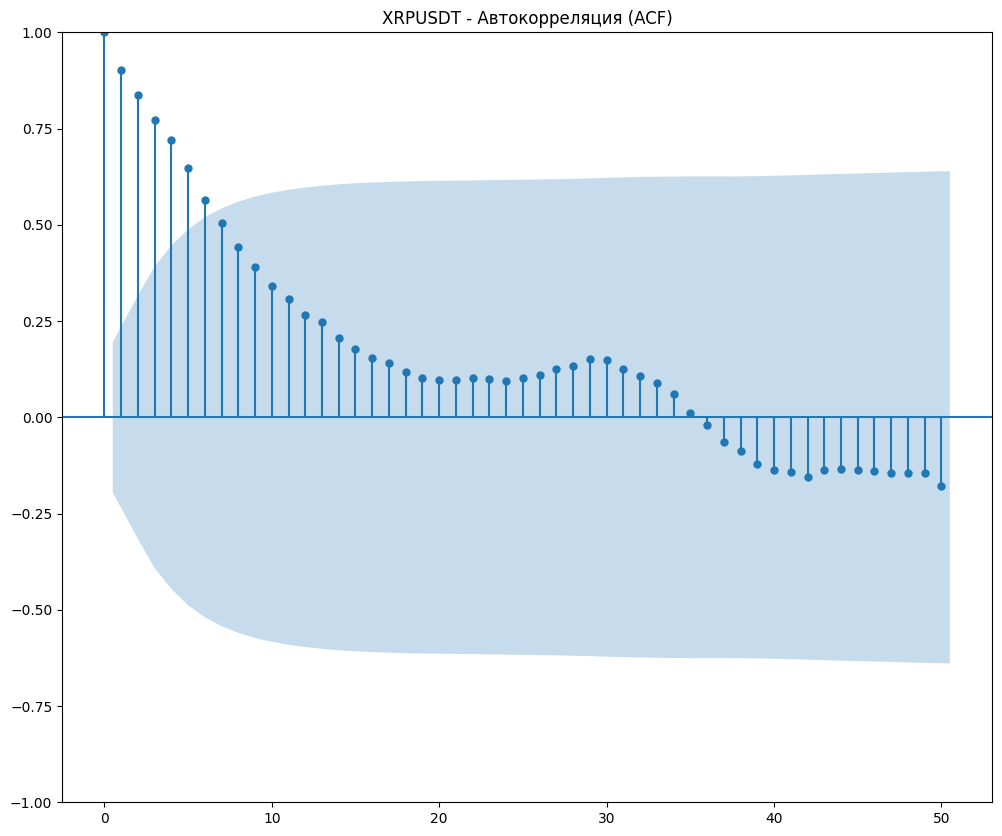

<Figure size 1200x600 with 0 Axes>

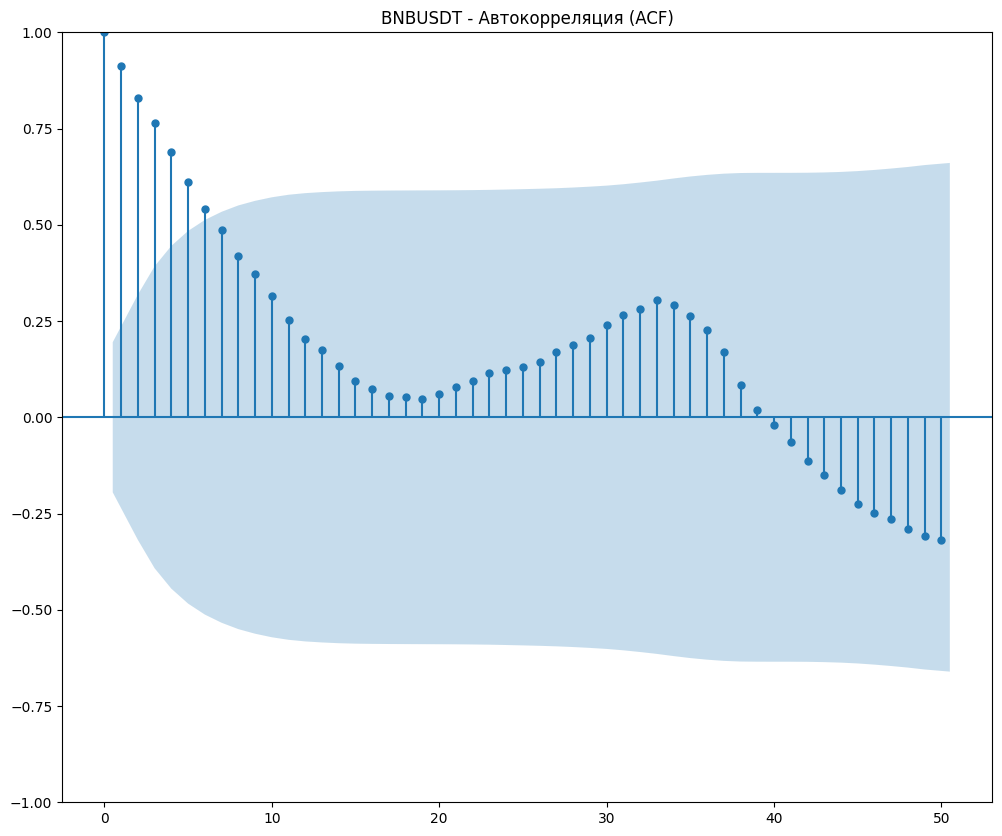

<Figure size 1200x600 with 0 Axes>

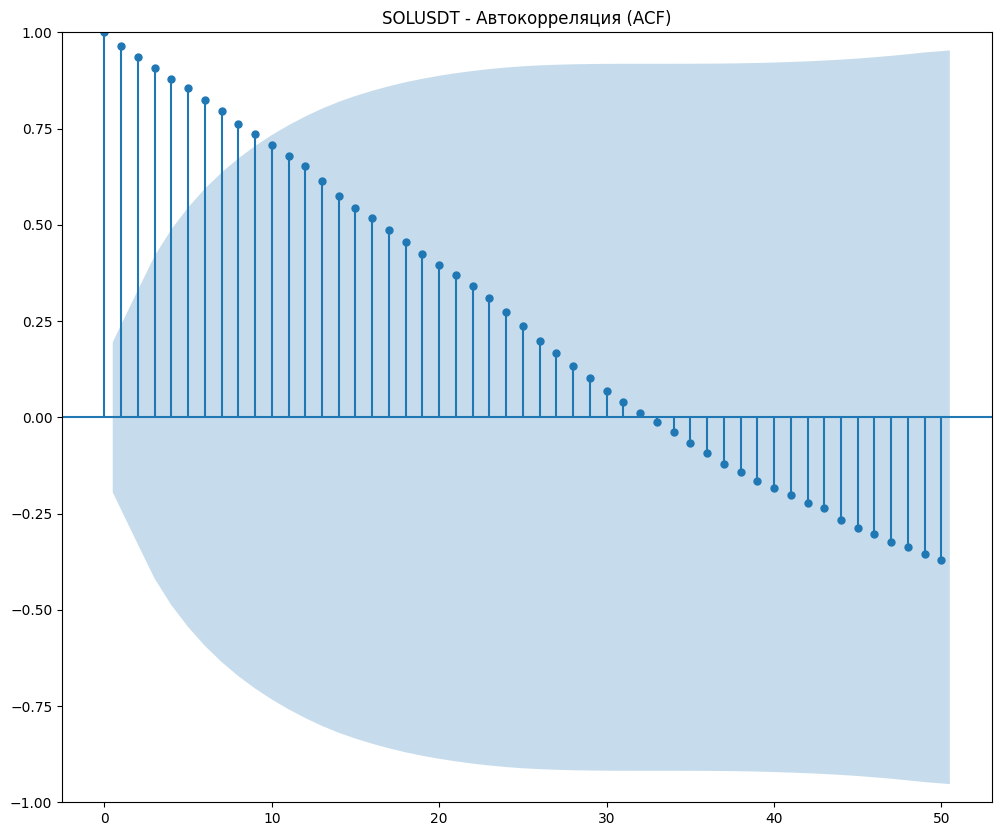

<Figure size 1200x600 with 0 Axes>

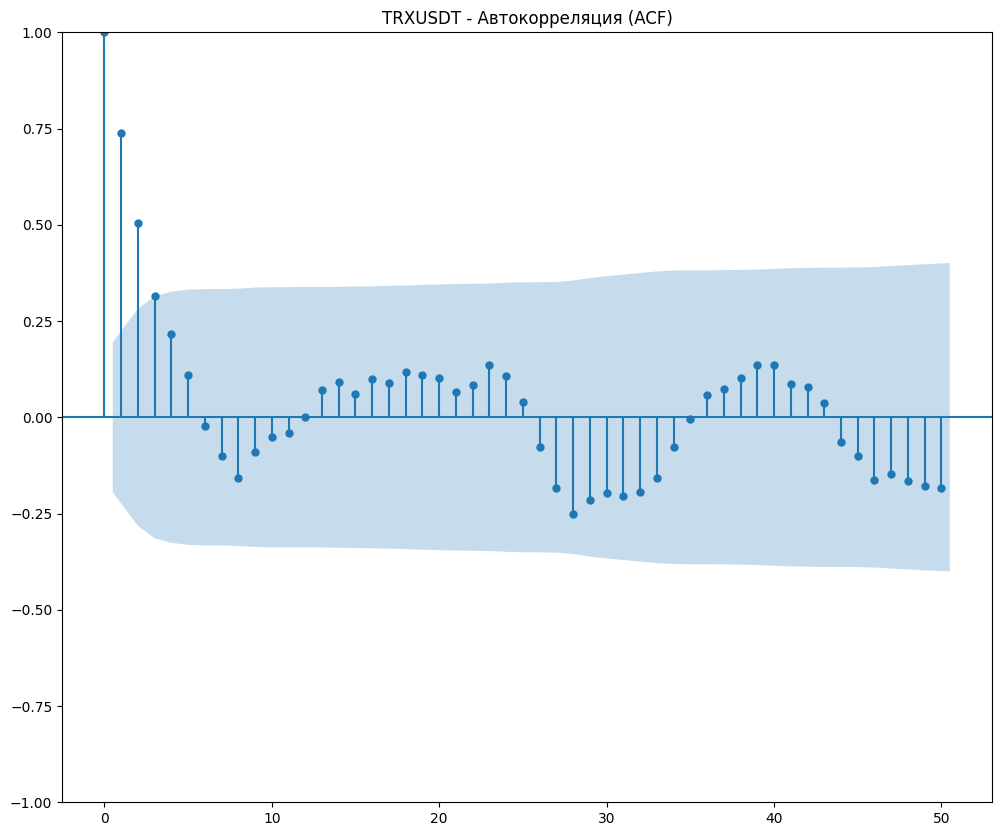

<Figure size 1200x600 with 0 Axes>

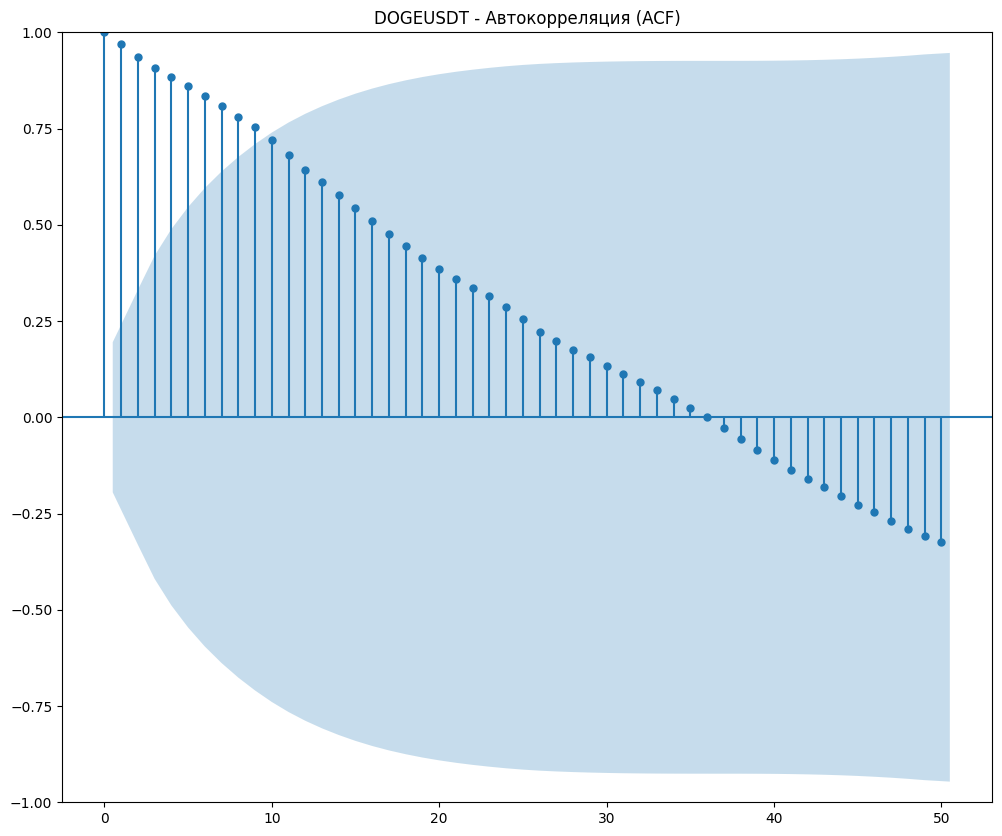

<Figure size 1200x600 with 0 Axes>

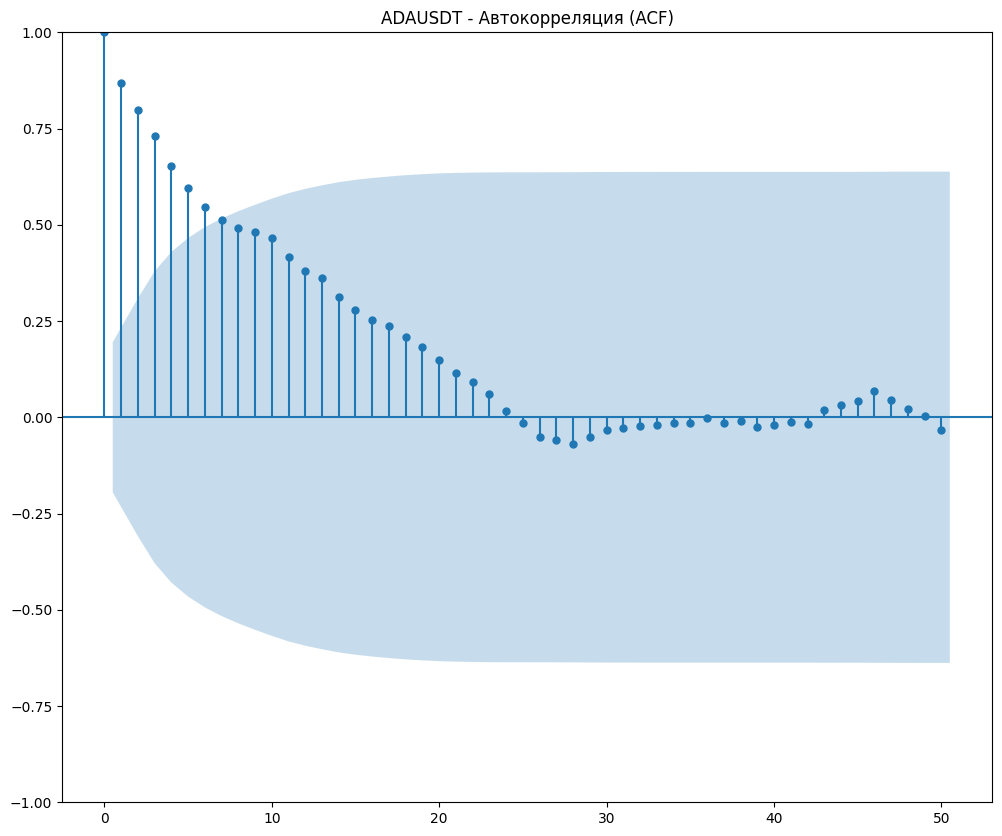

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных
df = pd.read_csv('preprocessed_crypto_data.csv', index_col=0, parse_dates=True)

# Для каждой криптовалюты в DataFrame
for coin in df.columns:
    series = df[coin]
    
    # Построение автокорреляционной функции
    plt.figure(figsize=(12, 6))
    plot_acf(series, lags=50)  # lags=50 - это количество лагов для автокорреляции
    plt.title(f'{coin} - Автокорреляция (ACF)')
    #насколько сильно текущее значение криптовалюты зависит от её предыдущих значений
    plt.show()


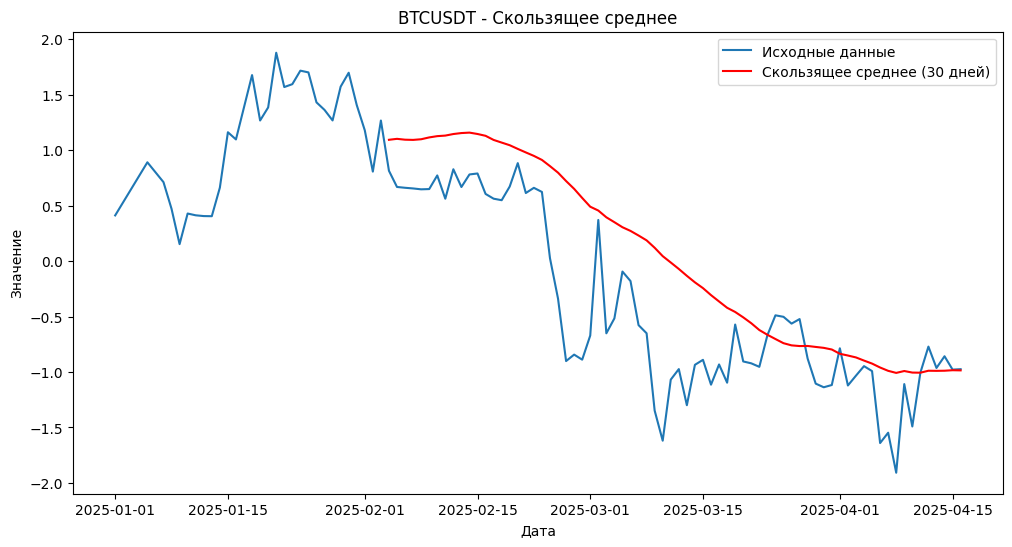

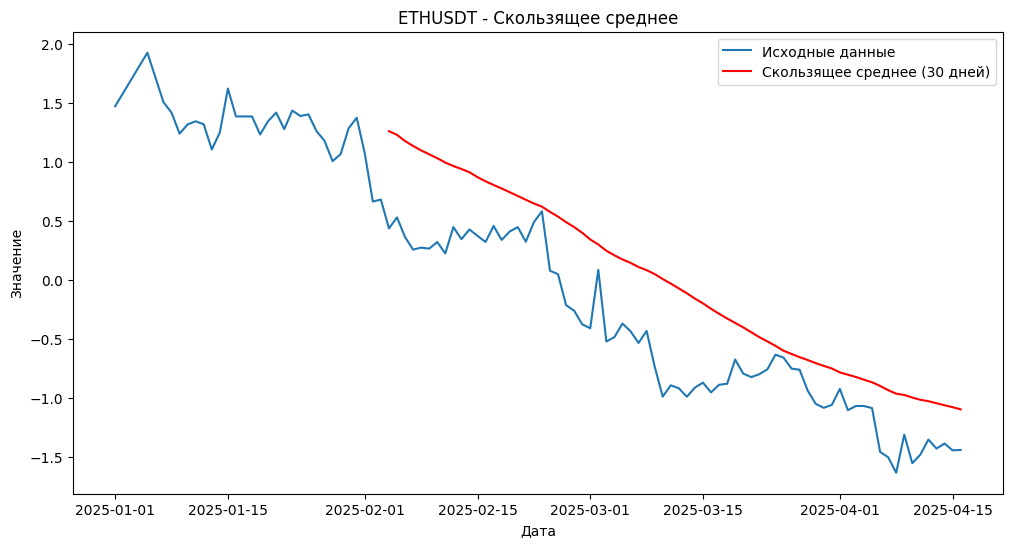

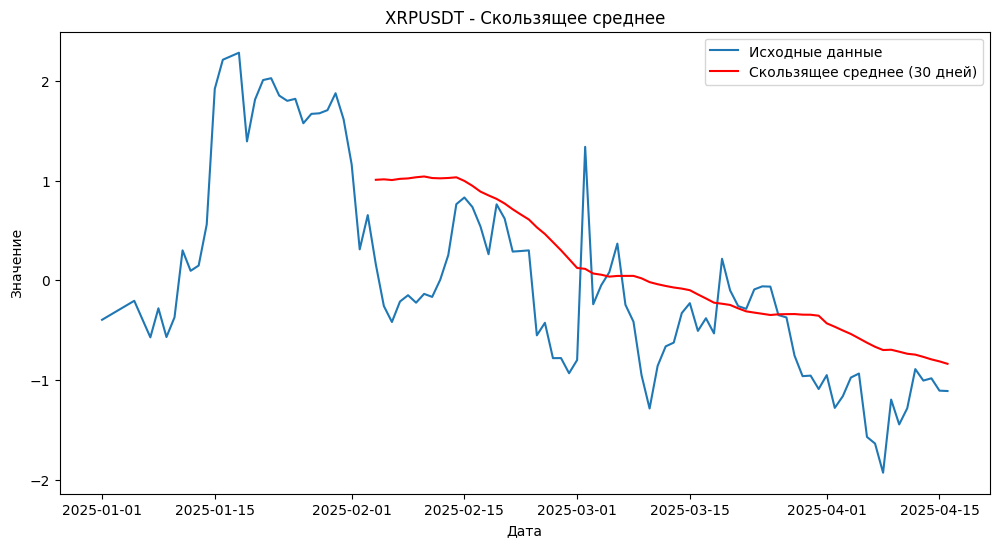

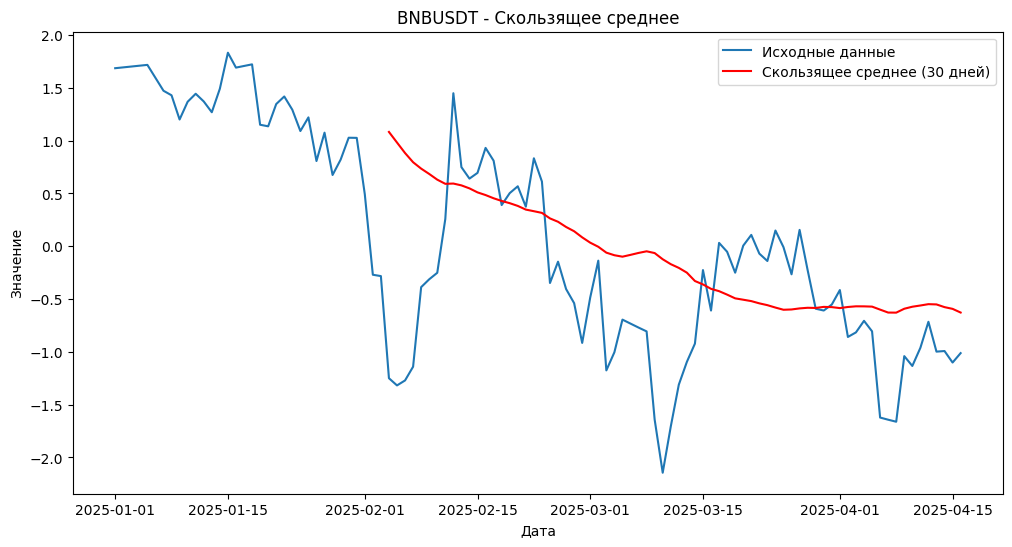

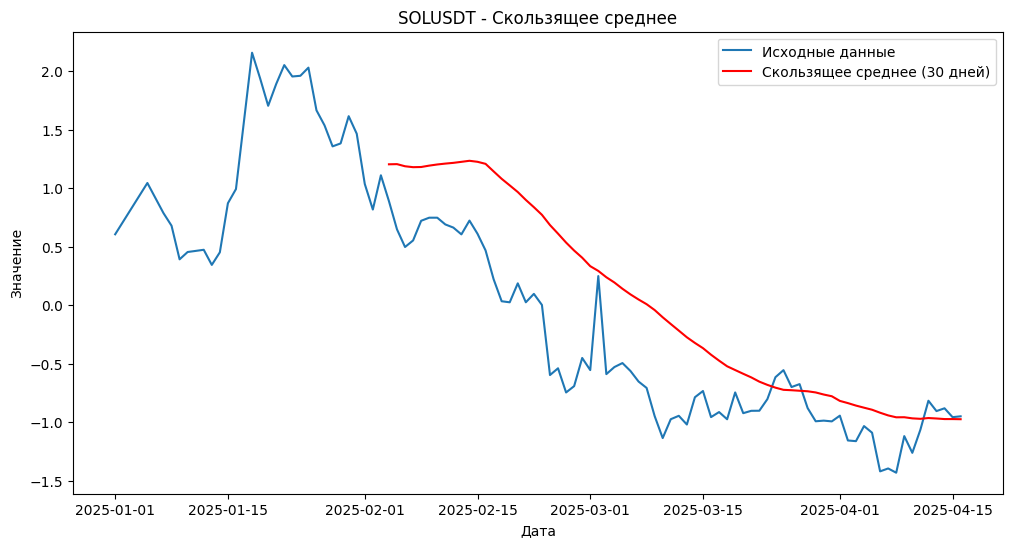

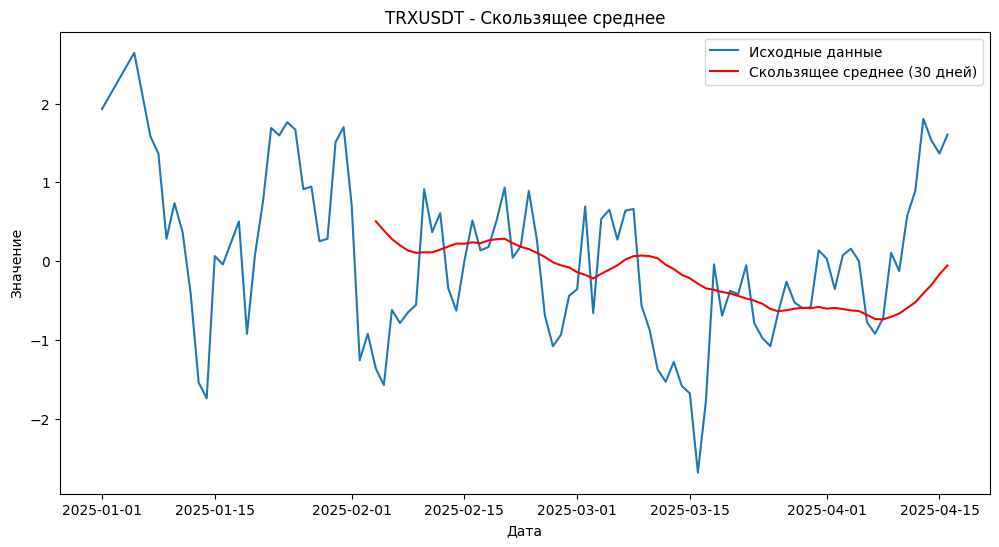

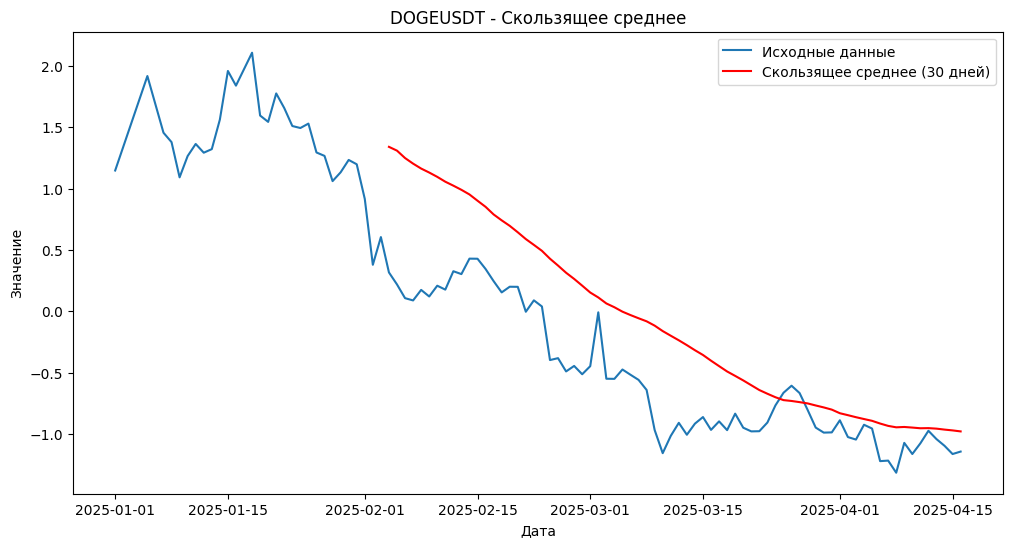

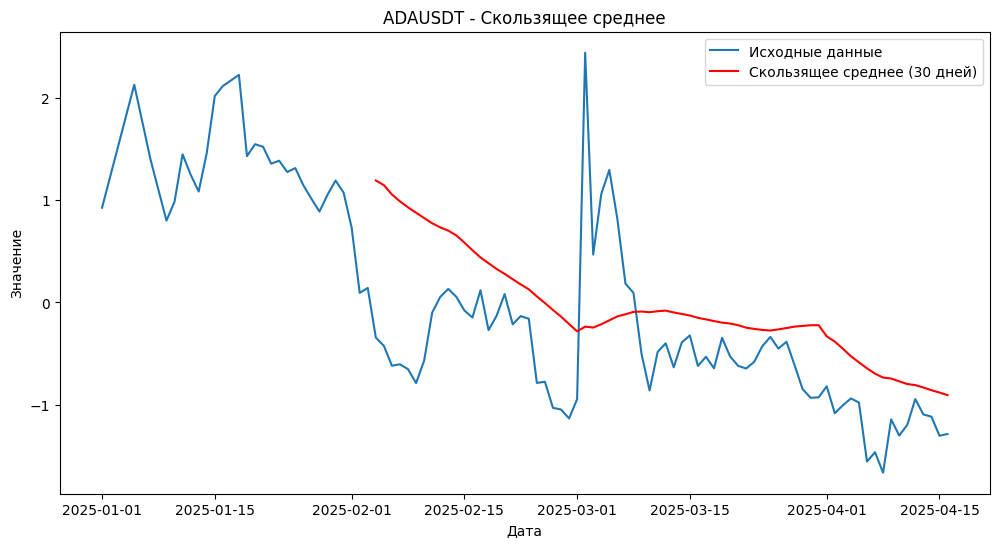

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('preprocessed_crypto_data.csv', index_col=0, parse_dates=True)

# Для каждой криптовалюты в DataFrame
for coin in df.columns:
    series = df[coin]
    
    # Скользящее среднее с окном 30 дней
    rolling_mean = series.rolling(window=30).mean()

    # Визуализация исходных данных и скользящего среднего
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Исходные данные')
    plt.plot(rolling_mean, label='Скользящее среднее (30 дней)', color='red')
    plt.title(f'{coin} - Скользящее среднее')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.legend()
    plt.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
#4 пункт
import pandas as pd

# Прочитаем данные из твоего CSV-файла
crypto_df = pd.read_csv('preprocessed_crypto_data.csv')  

# Убедимся, что колонка с датой называется 'timestamp' или аналогично
crypto_df['timestamp'] = pd.to_datetime(crypto_df['timestamp'])  

# Генерация полного диапазона дат с 1 января по 30 апреля 2025 года
full_dates = pd.date_range(start="2025-01-01", end="2025-04-09", freq="D")

# Создаем новый DataFrame с полными датами
full_dates_df = pd.DataFrame(full_dates, columns=['timestamp'])

# Объединяем данные о криптовалютах с полными датами
merged_df = pd.merge(full_dates_df, crypto_df, on='timestamp', how='left')

# Выводим результат
print(merged_df)


    timestamp   BTCUSDT   ETHUSDT   XRPUSDT   BNBUSDT   SOLUSDT   TRXUSDT  \
0  2025-01-01  0.411795  1.470352 -0.395458  1.685930  0.606934  1.931685   
1  2025-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2  2025-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
3  2025-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
4  2025-01-05  0.890809  1.923938 -0.205053  1.717424  1.045418  2.644916   
..        ...       ...       ...       ...       ...       ...       ...   
94 2025-04-05 -0.992017 -1.087752 -0.934652 -0.805578 -1.088321  0.001765   
95 2025-04-06 -1.640722 -1.458458 -1.570477 -1.622035 -1.418617 -0.774398   
96 2025-04-07 -1.547602 -1.504078 -1.636519 -1.642451 -1.393862 -0.921239   
97 2025-04-08 -1.908380 -1.635129 -1.929273 -1.661565 -1.430306 -0.721954   
98 2025-04-09 -1.109207 -1.312397 -1.195672 -1.040371 -1.117431  0.106652   

    DOGEUSDT   ADAUSDT  
0   1.146887  0.925559  
1        NaN       NaN  


In [53]:
import pandas as pd

# Заполнение NaN значений предыдущими данными (метод forward fill)
merged_df = merged_df.ffill()

# Выводим итоговый DataFrame
print(merged_df)

    timestamp   BTCUSDT   ETHUSDT   XRPUSDT   BNBUSDT   SOLUSDT   TRXUSDT  \
0  2025-01-01  0.411795  1.470352 -0.395458  1.685930  0.606934  1.931685   
1  2025-01-02  0.411795  1.470352 -0.395458  1.685930  0.606934  1.931685   
2  2025-01-03  0.411795  1.470352 -0.395458  1.685930  0.606934  1.931685   
3  2025-01-04  0.411795  1.470352 -0.395458  1.685930  0.606934  1.931685   
4  2025-01-05  0.890809  1.923938 -0.205053  1.717424  1.045418  2.644916   
..        ...       ...       ...       ...       ...       ...       ...   
94 2025-04-05 -0.992017 -1.087752 -0.934652 -0.805578 -1.088321  0.001765   
95 2025-04-06 -1.640722 -1.458458 -1.570477 -1.622035 -1.418617 -0.774398   
96 2025-04-07 -1.547602 -1.504078 -1.636519 -1.642451 -1.393862 -0.921239   
97 2025-04-08 -1.908380 -1.635129 -1.929273 -1.661565 -1.430306 -0.721954   
98 2025-04-09 -1.109207 -1.312397 -1.195672 -1.040371 -1.117431  0.106652   

    DOGEUSDT   ADAUSDT  
0   1.146887  0.925559  
1   1.146887  0.925559  


In [19]:
!pip install spacy

  Using cached spacy-3.8.5-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.12-cp310-cp310-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp310-cp310-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.9-cp310-cp310-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.6-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.2-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.3-py3-none-any.whl.metadata (65 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-non

In [21]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 5.3 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 6.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.8 MB 5.9 MB/s eta 0:00:02
     ----------------- ---------------------- 5.5/12.8 MB 6.0 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 6.6 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 7.3 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 8.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
!pip install textblob

In [24]:
!pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [54]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Загрузка данных
df = pd.read_csv('crypto_news_2025.csv')

# Инициализация анализатора
analyzer = SentimentIntensityAnalyzer()

# Функция для определения тональности
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(str(text))['compound']
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Применяем функцию ко всем заголовкам
df['calculated_sentiment'] = df['title'].apply(get_sentiment)

# Выводим все строки с тональностью
print(df[['title', 'calculated_sentiment']])
df.to_csv('crypto_news_with_vader_sentiment.csv', index=False)

                                                title calculated_sentiment
0   Semler scientific files to raise $500M as Bitc...              neutral
1   Semler Scientific reports $42M paper loss on B...             negative
2   Supply Shock: The BPI's Plan To Make America A...             negative
3   XRP Price To Breakout As Bullish Reversal Patt...              neutral
4   Bitcoin bulls ‘coming back’ as key metric on B...              neutral
5   Markets Face Bumpy Climb After Peak Tariff Unc...             negative
6   Ethereum Price  Dips Again—Time to Panic or Op...             negative
7   Semler Scientific files $500 million offering ...              neutral
8   Semler Scientific Files for $500 Million Raise...              neutral
9   Bitcoin: Despite 2024 bull run, the market fee...             positive
10  ‘Bitcoin Wants To Go Higher,’ Says Bitwise CIO...              neutral
11  Solana's 'Strategy,' Janover increases SOL hol...              neutral
12  Noble’s New ‘AppLayer

In [31]:
!pip install textblob transformers torch vaderSentiment
!python -m textblob.download_corpora

  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached torch-2.6.0-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
Using cached torch-2.6.0-cp310-cp310-win_amd64.whl (204.2 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Using cached safetensors-0.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already u

In [32]:
!pip install hf_xet

  Using cached hf_xet-1.0.3-cp37-abi3-win_amd64.whl.metadata (498 bytes)
Using cached hf_xet-1.0.3-cp37-abi3-win_amd64.whl (4.1 MB)


In [45]:
!pip install numpy==2.2.4
!pip install thinc==8.3.6

In [40]:
!pip install --upgrade spacy

In [42]:
!pip install numpy==2.2.4

  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [55]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# --- TEXTBLOB ---
def analyze_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['title'].apply(analyze_textblob)

# --- VADER ---
vader = SentimentIntensityAnalyzer()

def analyze_vader(text):
    scores = vader.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['title'].apply(analyze_vader)

# --- TRANSFORMERS (с PyTorch) ---
transformer_classifier = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    framework='pt'  # <--- вот здесь важно!
)

def analyze_transformer(text):
    result = transformer_classifier(text[:512])[0]  # обрезка, т.к. модели ограничены по длине
    label = result['label']
    if label == 'POSITIVE':
        return 'positive'
    elif label == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

df['transformer_sentiment'] = df['title'].apply(analyze_transformer)

# --- Сохраняем ---
df.to_csv('sentiment_analysis_results.csv', index=False)


Device set to use cpu


In [20]:
!pip install torch

In [56]:
#5 пункт - Формирование набора данных
import pandas as pd
import numpy as np

# Загрузка данных
prices_df = pd.read_csv('auto_top10_binance_prices_2025.csv', parse_dates=['timestamp'])
sentiment_df = pd.read_csv('sentiment_analysis_results.csv', parse_dates=['published_at'])

# Переименовываем для объединения
prices_df = prices_df.rename(columns={'timestamp': 'date'})
sentiment_df = sentiment_df.rename(columns={'published_at': 'date'})

# Подсчёт среднего значения тональности по дням
sentiment_df['sentiment_score'] = sentiment_df['transformer_sentiment'].map({
    'positive': 1,
    'neutral': 0,
    'negative': -1
})
daily_sentiment = sentiment_df.groupby(sentiment_df['date'].dt.date)['sentiment_score'].mean().reset_index()
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Список валют
currencies = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BNBUSDT', 'SOLUSDT', 'DOGEUSDT', 'ADAUSDT', 'TRXUSDT']

# Объединение
full_df = pd.merge(prices_df, daily_sentiment, on='date', how='left')

# Добавление технических индикаторов
for currency in currencies:
    #скользящее среднее за 7 дней.
    full_df[f'{currency}_ma7'] = full_df[currency].rolling(window=7).mean()
    #усредленную цену" за последнюю неделю — сглаживает шум.
    full_df[f'{currency}_ma21'] = full_df[currency].rolling(window=21).mean()
    #Лаги (запаздывания)
    full_df[f'{currency}_lag1'] = full_df[currency].shift(1)
    full_df[f'{currency}_lag2'] = full_df[currency].shift(2)
    #стандартное отклонение за последние 7 дней.
    full_df[f'{currency}_volatility_7d'] = full_df[currency].rolling(window=7).std()

    # RSI (Relative Strength Index) — это индекс относительной силы. Он показывает, перекуплена или перепродана криптовалюта (или другой актив).
    #Значение RSI — от 0 до 100:
    #> 70 — возможно, актив перекуплен (может скоро упасть).
    #< 30 — возможно, актив перепродан (может вырасти).
    #Всё между 30 и 70 — считается нормальным, нейтральным состоянием.
    def compute_rsi(data, window=14):
        delta = data.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    full_df[f'{currency}_RSI'] = compute_rsi(full_df[currency])

# Заполнение пропусков в тональности
full_df['sentiment_score'] = full_df['sentiment_score'].fillna(0)

# Удаление строк с NaN
full_df = full_df.dropna()

# Сохранение результата
output_path = 'final_crypto_features.csv'
full_df.to_csv(output_path, index=False)

C:\Users\User\anaconda3\envs\py10env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\User\anaconda3\envs\py10env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\User\anaconda3\envs\py10env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\User\anaconda3\envs\py10env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\User\anaconda3\envs\py10env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\User\anaconda3\envs\py10env\lib\site-

Средний RMSE для ARIMA: 3273.1293530292473
Средний MAE для ARIMA: 2816.102681754852


C:\Users\User\anaconda3\envs\py10env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



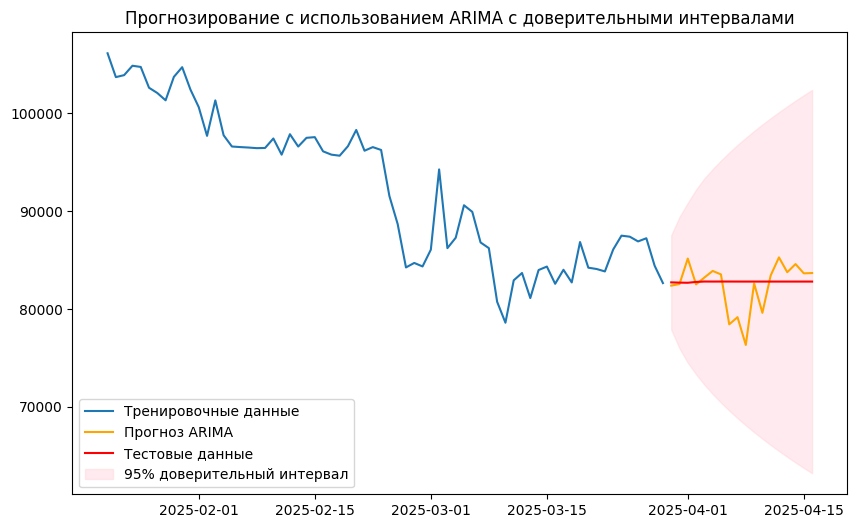

In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Загружаем данные из CSV файла
# Замените 'path_to_your_file.csv' на путь к вашему файлу
# Убедитесь, что в вашем файле есть столбец с датами и столбец с значениями временного ряда

data = pd.read_csv('final_crypto_features.csv', parse_dates=['date'], index_col='date')

# Пример: Замените 'value_column' на название столбца с вашими данными
data_series = data['BTCUSDT']

# Разделим данные на тренировочные и тестовые(train (тренировочные) — 80% данных (в начале).test (тестовые) — оставшиеся 20% (в конце).)
train_size = int(len(data_series) * 0.8)
train, test = data_series[:train_size], data_series[train_size:]

# Кросс-валидация через TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
rmse_arima, mae_arima = [], []

def evaluate_arima(train, val):
    # Инициализируем и обучаем модель ARIMA (параметры p, d, q можно настроить)
    model = ARIMA(train, order=(5, 1, 0))  # Пример с ARIMA(5,1,0)
    model_fit = model.fit()

    # Прогнозируем
    forecast = model_fit.forecast(steps=len(val))
    return forecast

# Кросс-валидация ARIMA
for train_idx, val_idx in tscv.split(train):
    train_cv, val_cv = train.iloc[train_idx], train.iloc[val_idx]
    
    forecast_arima = evaluate_arima(train_cv, val_cv)
    
    # Оценка качества модели с помощью RMSE и MAE
    rmse = np.sqrt(mean_squared_error(val_cv, forecast_arima))
    mae = mean_absolute_error(val_cv, forecast_arima)
    
    rmse_arima.append(rmse)
    mae_arima.append(mae)

# Выводим среднее значение метрик
print(f'Средний RMSE для ARIMA: {np.mean(rmse_arima)}')
print(f'Средний MAE для ARIMA: {np.mean(mae_arima)}')

# Прогнозируем на основе всей тренировки и тестовых данных
final_model = ARIMA(train, order=(5, 1, 0))  # ARIMA(5,1,0)
final_model_fit = final_model.fit()

# Прогнозируем на тестовых данных с доверительным интервалом
forecast_steps = len(test)
forecast_result = final_model_fit.get_forecast(steps=forecast_steps, alpha=0.05)  # 95% доверительный интервал

# Прогнозируем значения и доверительные интервалы
forecast_final = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(train, label='Тренировочные данные')
plt.plot(test.index, test, label='Прогноз ARIMA', color='orange')
plt.plot(test.index, forecast_final, label='Тестовые данные', color='red')

# Доверительный интервал
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% доверительный интервал')

plt.legend()
plt.title('Прогнозирование с использованием ARIMA с доверительными интервалами')
plt.show()


In [30]:
!pip install plotly


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   -- ------------------------------------- 1.0/14.8 MB 3.0 MB/s eta 0:00:05
   ------ --------------------------------- 2.4/14.8 MB 4.3 MB/s eta 0:00:03
   ----------- ---------------------------- 4.2/14.8 MB 5.6 MB/s eta 0:00:02
   ---------------- ----------------------- 6.0/14.8 MB 6.6 MB/s eta 0:00:02
   ------------------------ --------------- 8.9/14.8 MB 7.6 MB/s eta 0:00:01
   ------------------------------- -------- 11.5/14.8 MB 8.5 MB/s eta 0:00:01
   ------------------------------- -------- 11.8/14.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 8.9 MB/s eta 0:00:00


In [58]:
import plotly.graph_objects as go

# Строим график с использованием Plotly
fig = go.Figure()

# Исторические данные (тренировочные и тестовые)
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Тренировочные данные'))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Прогноз ARIMA', line=dict(color='orange')))

# Прогнозные данные (прогноз ARIMA)
fig.add_trace(go.Scatter(x=test.index, y=forecast_final, mode='lines', name='Тестовые данные', line=dict(color='red')))

# Доверительный интервал
fig.add_trace(go.Scatter(
    x=test.index, 
    y=conf_int.iloc[:, 0], 
    mode='lines', 
    name='Нижний доверительный интервал',
    line=dict(width=0),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=test.index, 
    y=conf_int.iloc[:, 1], 
    mode='lines', 
    name='Верхний доверительный интервал',
    fill='tonexty',
    fillcolor='rgba(255, 99, 71, 0.3)',  # Цвет заливки
    line=dict(width=0),
    showlegend=False
))

# Настройки графика
fig.update_layout(
    title='Прогнозирование с использованием ARIMA с доверительными интервалами',
    xaxis_title='Дата',
    yaxis_title='Цена',
    legend_title='Данные',
    template='plotly_dark',
    hovermode='x unified'
)

fig.show()
